# Исследование объявлений о продаже квартир

**Дано**  — архив объявлений сервиса Яндекс Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя. 

**Задача**  — научиться определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

## Открываем файл с данными и изучаемм общую информацию

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_columns = None

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t', decimal='.')

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

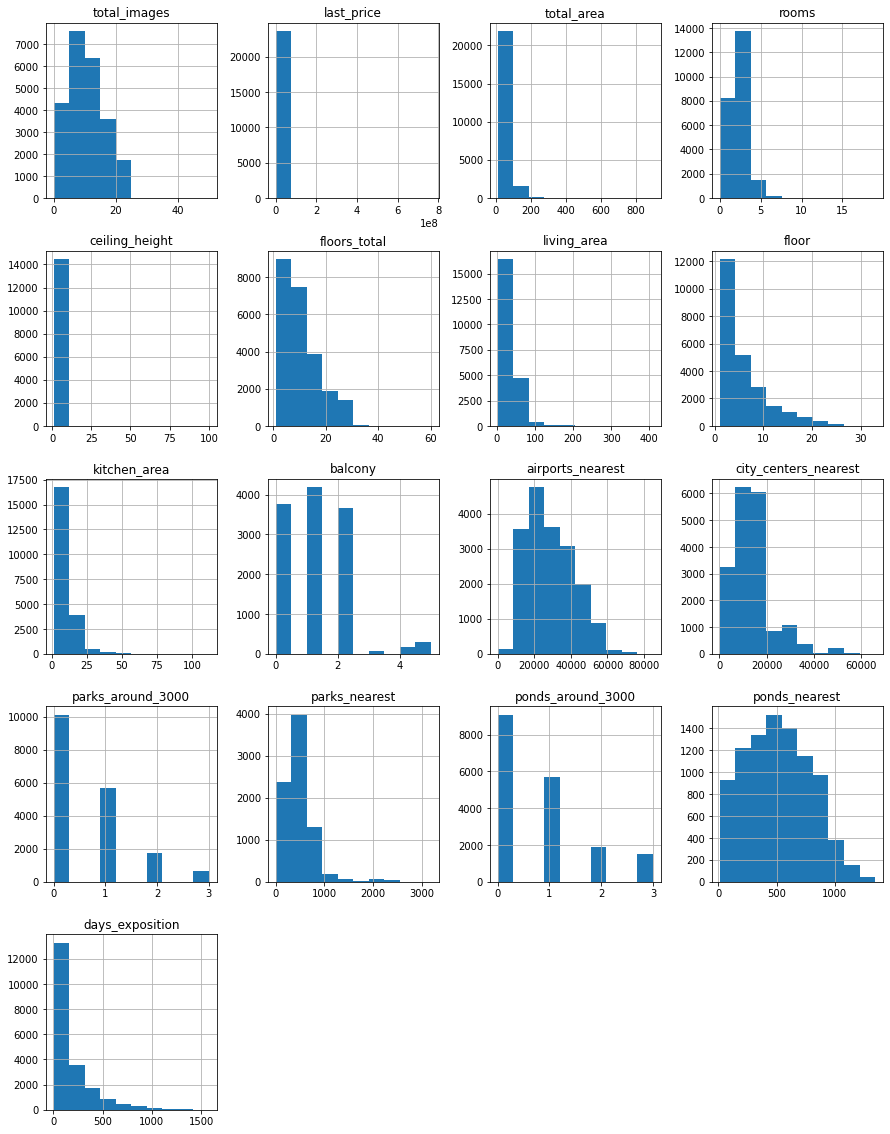

In [7]:
data.hist(figsize=(15, 20))

In [8]:
(data.describe(include='all'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,2775,23699,23699,21421.000000,12180.000000,23650,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,23550,23632,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.858475,6.541549e+06,60.348651,NaN,2.070636,2.771499,10.673824,34.457852,5.892358,NaN,NaN,NaN,10.569807,1.150082,NaN,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,NaN,NaN,NaN,5.905438,1.071300,NaN,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,NaN,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,NaN,1.300000,0.000000,NaN,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,NaN,1.000000,2.520000,5.000000,18.600000,2.000000,NaN,NaN,NaN,7.000000,0.000000,NaN,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,NaN,2.000000,2.650000,9.000000,30.000000,4.000000,NaN,NaN,NaN,9.100000,1.000000,NaN,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,NaN,3.000000,2.800000,16.000000,42.300000,8.000000,NaN,NaN,NaN,12.000000,2.000000,NaN,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000


### Выводы по шагу 1

На гистограммах видно:

* 'last_price' - есть несколько очень дорогих квартир стоимость которых на 2 порядка превышает основную массу предложений;
* 'total_area' - несколько квартир по площади на порядок превышает остальные, скорее всего это так и есть;
* 'rooms' - вероятно связан с 'total_area';
* 'ceiling_height' - в нескольких квартирах очень высокие потолки, возможно где-то второй свет, а где-то ошибка;
* 'floors_total' - Кто-то указал этажность которой нет в СПб и ЛО - самое высокое жилое здание 37 этажей (38 с техническим), вероятно ошибки;  
* 'living_area' - вероятно связан с 'total_area';
* 'floor' - самый высокий этаж объявления - 33, это подтверждает ошибку в 'floors_total', или квартиры на верхних этажах не размещают на Яндексе;
* 'kitchen_area' - вероятно связан с 'total_area';
* 'balcony' - если в квартире 900 м2 то и 5 балконов может быть;
* 'airports_nearest' - минимальное значение 0 м - что нереалистично, вероятно ошибка;
* 'city_centers_nearest' - распределение рваное, но такое может быть, проверим;
* 'parks_around_3000' - данные есть не для всех объявлений, за парк вероятно принят объект в названии которого есть слово "парк". Если это так, то "Таврический сад", "Летний сад" которые не уступают некоторым паркам например "Парк Героев-Пожарных" не учтены, что исказит результаты.  СП 475.1325800.2020 п.5.1 "... Минимальная площадь территории парка 2 га. ..."
* 'parks_nearest' - среднее значение 490 м, что нереалистично. Чем больше радиус, тем больше площадь застройки в этой зоне. Также важна точка отсчета, это: центр парка, метка на карте, точка входа в парк, ближайшая граница? Расстояние по прямой или по дорогам?
* 'ponds_around3000' - аналогично 'parks_around_3000', что считается водоемом?
* 'ponds_nearest' - аналогично 'parks_nearest';
* 'days_exposition' - есть объявления которые существуют несколько лет.

## Предобработка данных

### Работаем с пропусками и актуализируем название населенного пункта

In [9]:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим столбец - 'balcony'

In [10]:
data_balcony_not_skip = data.dropna(subset=['balcony']) 
data_balcony_not_skip = data_balcony_not_skip.pivot_table(index='rooms', values='total_area', aggfunc=['median', 'mean', 'count'])
display(data_balcony_not_skip.head(20))
data_balcony_skip = data[data['balcony'].isna()]
data_balcony_skip = data_balcony_skip.pivot_table(index='rooms', values='total_area', aggfunc=['median', 'mean', 'count'])
display(data_balcony_skip.head(20))

,median,mean,count
,total_area,total_area,total_area
rooms,,,
0,26.00,27.471032,126
1,37.00,38.083723,4228
2,53.50,55.970654,4130
3,72.30,77.600311,2954
4,98.30,108.197652,528
5,144.00,165.854604,139
6,213.00,226.131081,37
7,230.00,270.474074,27


,median,mean,count
,total_area,total_area,total_area
rooms,,,
0,27.00,32.489577,71
1,36.00,37.158594,3819
2,53.00,55.729819,3810
3,73.00,77.934248,2860
4,100.00,107.135491,652
5,148.60,158.219251,187
6,180.00,188.155882,68
7,203.15,260.981250,32


Медианные и средние площади квартир, с указанным количеством балконов и без близки. Замменим пропущенные значений в столбце на 0.

In [11]:
display(data['balcony'].isna().sum())
data['balcony'] = data['balcony'].fillna(0)
display(data['balcony'].isna().sum())

11519

0

Рассмотрим столбец - 'is_apartment'

In [12]:

data_apartment = data.pivot_table(index=['is_apartment'], values='total_area', aggfunc=['median', 'mean', 'count'])
data_apartment.head(100)

,median,mean,count
,total_area,total_area,total_area
is_apartment,,,
False,54.0,61.123761,2725
True,64.0,83.325800,50


Апартаменты - редкий тип недвижимости, введенный в законодательство недавно. Заменим пропуски на False.	

In [13]:
display(data['is_apartment'].isna().sum())
data['is_apartment'] = data['is_apartment'].fillna(False)
display(data['is_apartment'].isna().sum())

20924

0

Рассмотрим столбец - 'ceiling_height'

In [14]:
data_ceiling_height = data.pivot_table(index=['ceiling_height'], 
                                       values=['total_area', 'floors_total', 'floor', 'living_area'], 
                                       aggfunc=['median', 'mean', 'count'])
display(data_ceiling_height.head(10))
display(data_ceiling_height.tail(40))

median                                          mean  \
                floor floors_total living_area total_area     floor   
ceiling_height                                                        
1.00              7.0         12.0   32.400000      55.00  7.000000   
1.20              1.0          2.0   27.500000      42.80  1.000000   
1.75              5.0         37.0   17.400000      40.00  5.000000   
2.00              5.0          5.0   19.000000      38.00  5.636364   
2.20              2.0          2.0   18.000000      22.50  2.000000   
2.25              3.0          5.0   44.100002      58.60  3.000000   
2.30              1.5          5.0   36.000000      54.15  3.000000   
2.34              1.0          5.0         NaN      47.00  1.000000   
2.40              4.0          5.0   29.000000      46.20  3.826087   
2.45              4.0          5.0   28.100000      47.00  4.333333   

                                                   count               \
               floors_total living_area total_area floor floors_total   
ceiling_height                                                          
1.00              12.000000   32.400000  55.000000     1            1   
1.20               2.000000   27.500000  42.800000     1            1   
1.75              37.000000   17.400000  40.000000     1            1   
2.00               8.909091   28.133333  46.484545    11           11   
2.20               2.000000   18.000000  22.500000     1            1   
2.25               5.000000   44.100002  58.600000     1            1   
2.30               5.000000   36.350000  52.475000     4            4   
2.34               5.000000         NaN  47.000000     1            1   
2.40               6.304348   29.750000  47.843478    23           23   
2.45               6.666667   30.771429  51.280000    15           15   

                                       
               living_area total_area  
ceiling_height                         
1.00                     1          1  
1.20                     1          1  
1.75                     1          1  
2.00                     9         11  
2.20                     1          1  
2.25                     1          1  
2.30                     4          4  
2.34                     0          1  
2.40                    22         23  
2.45                    14         15

median                                           mean  \
                floor floors_total living_area total_area      floor   
ceiling_height                                                         
3.93              2.0          5.0       56.00     108.00   2.000000   
3.95              3.5          5.0       64.50     101.65   3.250000   
3.98              2.0          4.0       29.50      53.80   2.000000   
4.00              3.0          5.0       55.80      93.00   3.307692   
4.06              2.0          5.0       22.00      36.90   2.000000   
4.10              3.0          5.0       39.00      65.60   3.000000   
4.14              4.0          4.0         NaN     117.30   4.000000   
4.15              2.0          3.0       44.20      80.00   2.000000   
4.19              2.5          5.0       32.15      47.85   2.500000   
4.20              3.5          6.0       61.20     105.50   4.100000   
4.25              3.0          6.0       37.50      57.40   3.000000   
4.30              2.0          4.0       46.00      74.00   2.000000   
4.37              3.0          3.0       52.00      84.20   3.000000   
4.40              4.0          5.0      128.25     280.00   4.000000   
4.45              7.0          7.0      236.15     376.40   7.000000   
4.50              4.0          4.0       64.00      95.00   4.285714   
4.65              7.0          7.0      347.50     495.00   7.000000   
4.70             14.5         15.0      109.70     183.85  14.500000   
4.80              2.0          3.0       30.00      50.00   2.000000   
4.90              5.0          5.0      140.00     235.00   5.000000   
5.00              1.0          3.0         NaN      29.00   1.000000   
5.20              7.0          8.0      159.50     280.30   7.000000   
5.30              4.0          4.0      190.00     180.00   4.000000   
5.50              5.0          5.0       83.00     143.00   5.000000   
5.60              6.0          6.0         NaN     399.00   6.000000   
5.80              5.0          5.0       68.00      71.00   5.000000   
6.00              7.0          7.0      147.00     187.60   7.000000   
8.00              2.0          5.0       29.00      54.00   1.666667   
8.30             14.0         16.0       19.30      45.00  14.000000   
10.30            15.0         16.0       15.50      45.00  15.000000   
14.00             5.0         14.0       32.40      56.40   5.000000   
20.00            14.0         17.0       53.20      92.90  14.000000   
22.60            11.0         14.0       35.00      60.00  11.000000   
24.00             1.0          5.0       19.50      30.50   1.000000   
25.00             2.0          5.0       30.00      43.00   2.857143   
26.00             3.0          9.0       21.30      50.00   3.000000   
27.00             3.0          5.0       31.55      55.00   5.750000   
27.50            19.0         24.0       37.70      42.00  19.000000   
32.00             3.5          4.5       54.25      83.70   3.500000   
100.00            5.0          5.0       14.00      25.00   5.000000   

                                                    count               \
               floors_total living_area  total_area floor floors_total   
ceiling_height                                                           
3.93               5.000000   56.000000  108.000000     1            1   
3.95               4.625000   63.527500  107.900000     8            8   
3.98               4.000000   29.500000   53.800000     1            1   
4.00               5.128205   75.681081  115.184615    39           39   
4.06               5.000000   22.000000   36.900000     1            1   
4.10               4.666667   39.000000   74.633333     3            3   
4.14               4.000000         NaN  117.300000     1            1   
4.15               3.000000   44.200000   80.000000     1            1   
4.19               5.000000   32.150000   47.850000     2            2   
4.20               5.500000   

Столбец содержит почти 39% пропусков что много, заполнить их можно для типового жилья и типового этажа зная серию. Также если для этого дома и такого же этажа (в историческом центре может быть разная высота этажей в доме) ранее указывалась эта информация.  
Столбец 'floors_total' так же теоретически можно заполнить если имеются данные по этому дому/подъезду. Но сейчас это не возможно. 

Постройки с высотой потолков до 4.3 м вероятно относятся к историческому центру Санкт-Петербурга начала XX века.

Квартиры в диапазоне 4.37-10.3 м расположены на последних/предпоследних этажах, видимо это двух уровневые многосветные квартиры или мансардные помещения с указанием максимальной высоты.

Большая высота потолков видимо указана ошибочно в дециметрах, квартины расположены в середине по этажности, разделим значения более 10.3 м на 10.

Согласно СП 54.13330.2022. Здания жилые многоквартирные п. 5.12 Высота (от пола до потолка) жилых комнат и кухни ... – не менее 2.5 м. Высота внутриквартирных коридоров, холлов, передних, на антресоли и под ней ... не менее 2.1 м.

Согласно СП 55.13330.2016. Дома жилые одноквартирные .п.6.2 Высота помещений жилых комнат и кухни ... не менее 2.5 м ... Высоту комнат ... расположенных в мансарде или имеющих наклонные потолки или стены ... не менее 2.3 м. В коридорах и при устройстве антресолей ... не менее 2.1 м. 

То есть помещения с высотой потолка 2.1 м - 2.49 м могуть являться составной частью жилища. Сохраним эти значения и **возможно позже** удалим строки с высотой потолка менее 2.1 м. Это могут быть ошибки заполнения, технические помещения в многоквартирных домах или низкокачественный самострой/временное сооружение.    

In [15]:
data.loc[data['ceiling_height'] > 10.3,'ceiling_height'] = data['ceiling_height']/10

In [16]:
data_ceiling_height_2 = data.pivot_table(index=['ceiling_height'], 
                                         values=['total_area', 'floors_total', 'floor', 'living_area'], 
                                         aggfunc=['median', 'mean', 'count'])
display(data_ceiling_height_2.head(10))
display(data_ceiling_height_2.tail(20))

median                                           mean  \
                floor floors_total living_area total_area      floor   
ceiling_height                                                         
1.00              7.0         12.0   32.400000      55.00   7.000000   
1.20              1.0          2.0   27.500000      42.80   1.000000   
1.40              5.0         14.0   32.400000      56.40   5.000000   
1.75              5.0         37.0   17.400000      40.00   5.000000   
2.00              5.5          7.0   19.500000      39.00   6.333333   
2.20              2.0          2.0   18.000000      22.50   2.000000   
2.25              3.0          5.0   44.100002      58.60   3.000000   
2.26             11.0         14.0   35.000000      60.00  11.000000   
2.30              1.5          5.0   36.000000      54.15   3.000000   
2.34              1.0          5.0         NaN      47.00   1.000000   

                                                   count               \
               floors_total living_area total_area floor floors_total   
ceiling_height                                                          
1.00              12.000000   32.400000    55.0000     1            1   
1.20               2.000000   27.500000    42.8000     1            1   
1.40              14.000000   32.400000    56.4000     1            1   
1.75              37.000000   17.400000    40.0000     1            1   
2.00               9.583333   30.640000    50.3525    12           12   
2.20               2.000000   18.000000    22.5000     1            1   
2.25               5.000000   44.100002    58.6000     1            1   
2.26              14.000000   35.000000    60.0000     1            1   
2.30               5.000000   36.350000    52.4750     4            4   
2.34               5.000000         NaN    47.0000     1            1   

                                       
               living_area total_area  
ceiling_height                         
1.00                     1          1  
1.20                     1          1  
1.40                     1          1  
1.75                     1          1  
2.00                    10         12  
2.20                     1          1  
2.25                     1          1  
2.26                     1          1  
2.30                     4          4  
2.34                     0          1

median                                           mean  \
                floor floors_total living_area total_area      floor   
ceiling_height                                                         
4.30              2.0          4.0       46.00      74.00   2.000000   
4.37              3.0          3.0       52.00      84.20   3.000000   
4.40              4.0          5.0      128.25     280.00   4.000000   
4.45              7.0          7.0      236.15     376.40   7.000000   
4.50              4.0          4.0       64.00      95.00   4.285714   
4.65              7.0          7.0      347.50     495.00   7.000000   
4.70             14.5         15.0      109.70     183.85  14.500000   
4.80              2.0          3.0       30.00      50.00   2.000000   
4.90              5.0          5.0      140.00     235.00   5.000000   
5.00              1.0          3.0         NaN      29.00   1.000000   
5.20              7.0          8.0      159.50     280.30   7.000000   
5.30              4.0          4.0      190.00     180.00   4.000000   
5.50              5.0          5.0       83.00     143.00   5.000000   
5.60              6.0          6.0         NaN     399.00   6.000000   
5.80              5.0          5.0       68.00      71.00   5.000000   
6.00              7.0          7.0      147.00     187.60   7.000000   
8.00              2.0          5.0       29.00      54.00   1.666667   
8.30             14.0         16.0       19.30      45.00  14.000000   
10.00             5.0          5.0       14.00      25.00   5.000000   
10.30            15.0         16.0       15.50      45.00  15.000000   

                                                    count               \
               floors_total living_area  total_area floor floors_total   
ceiling_height                                                           
4.30               4.000000   46.000000   74.000000     1            1   
4.37               3.000000   52.000000   84.200000     1            1   
4.40               5.333333  128.250000  231.666667     3            3   
4.45               7.000000  236.150000  376.400000     2            2   
4.50               4.571429   76.685714  112.942857     7            7   
4.65               7.000000  347.500000  495.000000     1            1   
4.70              15.000000  109.700000  183.850000     2            2   
4.80               3.000000   30.000000   50.000000     1            1   
4.90               5.000000  140.000000  235.000000     1            1   
5.00               3.000000         NaN   29.000000     1            1   
5.20               8.000000  159.500000  280.300000     1            1   
5.30               4.000000  190.000000  180.000000     2            2   
5.50               5.000000   83.000000  143.000000     1            1   
5.60               6.000000         NaN  399.000000     1            1   
5.80               5.000000   68.000000   71.000000     1            1   
6.00               7.000000  147.000000  187.600000     1            1   
8.00               8.666667   28.433333   50.333333     3            3   
8.30              16.000000   19.300000   45.000000     1            1   
10.00              5.000000   14.000000   25.000000     1            1   
10.30             16.000000   15.500000   45.000000     1            1   

                                       
               living_area total_area  
ceiling_height                         
4.30                     1          1  
4.37                     1          1  
4.40                     2          3  
4.45                     2          2  
4.50                     7          7  
4.65                     1          1  
4.70                     2          2  
4.80                     1          1  
4.90                     1          1  
5.00                     0          1  
5.20                     1          1  
5.30                     1          2  
5.50                     1          1  
5.60           

Рассмотрим столбец - 'locality_name'.

In [17]:
display(len(data['locality_name'].sort_values().unique()))
data['locality_name'] = (data['locality_name'].str.replace('ё', 'е')) 
data_locality_name_unique = data['locality_name'].sort_values().unique()
display(len(data_locality_name_unique))
display(data_locality_name_unique)

365

331

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

Для определения дубликатов сначала добавим вспомогательный столбец с указанием типа населенного пункта.

In [18]:
def categorize_town(row):
    try:
        town = row['locality_name']
        if town.find('городской') >= 0:
            return 'г. п.'
        if town.find('деревня') >= 0:
            return 'д.'
        if town.find('коттеджный') >= 0:
            return 'к. п'
        if town.find('типа') >= 0:
            return 'пгт.'
        if town.find('станции') >= 0:
            return 'п. ж/д ст.'
        if town.find('товарищество') >= 0:
            return 'снт.'   
        if town.find('nan') >= 0:
            return 'не указан'
        if town.find('поселок') >= 0:
            return 'п.'
        if town.find('село') >= 0:
            return 'с.'        
        return 'Город'
    except:
        pass

In [19]:
pd.set_option('display.max_rows', None)
data['town_category'] = data.apply(categorize_town, axis=1)
display(data.pivot_table(index=['town_category', 'locality_name'], values=['total_area', 'floors_total'], aggfunc=['median', 'count']))
display((data.groupby('town_category').count()).head(20))

median  \
                                                                 floors_total   
town_category locality_name                                                     
Город         Бокситогорск                                                5.0   
              Волосово                                                    5.0   
              Волхов                                                      5.0   
              Всеволожск                                                  9.0   
              Выборг                                                      5.0   
              Высоцк                                                      4.5   
              Гатчина                                                     5.0   
              Зеленогорск                                                 4.0   
              Ивангород                                                   5.0   
              Каменногорск                                                5.0   
              Кингисепп                                                   5.0   
              Кириши                                                      5.0   
              Кировск                                                     5.0   
              Колпино                                                     9.0   
              Коммунар                                                    5.0   
              Красное Село                                                6.0   
              Кронштадт                                                   5.0   
              Кудрово                                                    18.0   
              Лодейное Поле                                               5.0   
              Ломоносов                                                   5.0   
              Луга                                                        5.0   
              Любань                                                      4.5   
              Мурино                                                     19.0   
              Никольское                                                  9.0   
              Новая Ладога                                                5.0   
              Отрадное                                                    5.0   
              Павловск                                                    4.0   
              Петергоф                                                    5.0   
              Пикалево                                                    5.0   
              Подпорожье                                                  5.0   
              Приморск                                                    5.0   
              Приозерск                                                   5.0   
              Пушкин                                                      5.0   
              Санкт-Петербург                                             9.0   
              Светогорск                                                  9.0   
              Сертолово                                                   9.0   
              Сестрорецк                                                  5.0   
              Сланцы                                                      5.0   
              Сосновый Бор                                                9.0   
              Сясьстрой                                                   5.0   
              Тихвин                                                      5.0   
              Тосно                                                       5.0   
              Шлиссельбург                                                5.0   
г. п.         городской поселок Большая Ижора                             5.0   
              городской поселок Будогощь                                  3.0   
              городской поселок Виллози                                   5.0   
              городской поселок Лесогорский                               4.5   
              городск

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
town_category,,,,,,,,,,,,,,,,,,,,,,
Город,20008,20008,20008,20008,20008,12625,19934,18464,20008,20008,20008,20008,18197,20008,20008,17191,17214,17215,8035,17215,8834,17252
г. п.,187,187,187,187,187,109,186,164,187,187,187,187,155,187,187,0,0,0,0,0,0,146
д.,945,945,945,945,945,511,944,852,945,945,945,945,817,945,945,0,0,0,0,0,0,835
к. п,3,3,3,3,3,2,3,3,3,3,3,3,2,3,3,0,0,0,0,0,0,3
п.,2092,2092,2092,2092,2092,1013,2084,1887,2092,2092,2092,2092,1835,2092,2092,925,925,925,29,925,251,1890
п. ж/д ст.,15,15,15,15,15,8,15,13,15,15,15,15,12,15,15,0,0,0,0,0,0,13
пгт.,363,363,363,363,363,204,362,337,363,363,363,363,332,363,363,0,0,0,0,0,0,302
с.,32,32,32,32,32,16,32,27,32,32,32,32,26,32,32,0,0,0,0,0,0,25
снт.,5,5,5,5,5,2,5,5,5,5,5,5,5,5,5,0,0,0,0,0,0,4


Добавим столбец 'locality_name_clean' - без типа населенного пункта. В дальнейшем столбц 'locality_name' не используем. 

In [20]:
data['locality_name_clean'] = data['locality_name'].replace(['городской поселок ', 
                                                             'деревня ', 'коттеджный поселок ', 
                                                             'поселок при железнодорожной станции ', 
                                                             'поселок станции ', 'поселок городского типа ', 
                                                             'поселок ', 'село ', 
                                                             'садоводческое некоммерческое товарищество ', 
                                                             'садовое товарищество '], '', regex=True)

In [21]:
display(data[data['locality_name'].isna()].head(50))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category,locality_name_clean
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,None,NaN
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,None,NaN
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,False,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,None,NaN
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,False,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,None,NaN
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,False,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,None,NaN
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,None,NaN
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,None,NaN
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,False,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,None,NaN
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,None,NaN
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,False,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,None,NaN


Удалим строки без указания 'locality_name' - без координат адрес не восстановить, количество их незначительно.

In [22]:
display(data['locality_name'].isna().sum())
data = data.dropna(subset=['locality_name'])
display(data['locality_name'].isna().sum())
len(data)

49

0

23650

In [23]:
display(data.pivot_table(index=['locality_name_clean', 'town_category'], values=['floors_total'], aggfunc=['median', 'count']))

,,median,count
,,floors_total,floors_total
locality_name_clean,town_category,,
Агалатово,д.,4.5,4
Александровская,п.,9.5,2
Алексеевка,п.,2.0,1
Аннино,п.,5.0,16
Аро,д.,4.0,3
Барышево,п.,2.5,2
Батово,д.,5.0,9
Бегуницы,д.,5.0,17


Для некоторых населенных пунктов есть дублирование, тип населенного пункта устанавливается нормативными документами субъекта РФ и может меняться. Кудрово до 2018 г было деревней, а стало городом. Такие изменения происходят регулярно, **с момента выгрузки датасета категории могли поменяться, но в данном исследовании просто устраним разночтения. Например поселок Бугры в 2024 г  стал Городом** Хотя возможно есть влияние типа населенного пункта на стоимость жилья. 

Актуализируем информацию в столбце 'town_category'. Некоторые населенные пункты действительно разные например Громово есть поселок, а есть поселок при ж.д станции.

В будущем при заполнении информации пользователемм желательно разделить ячейки типа и названия для населенного пункта. А также добавить район и муниципальное образование, поселение, в соотвествии с законодательным актом Ленинградской области.

Теоретически зная адрес объекта столбцы 'locality_name_clean' и 'town_category' можно заполнить, но сейчас это не возможно.

In [24]:
data.loc[data['locality_name_clean'] == 'Большая Ижора','town_category'] = 'г. п.'
data.loc[data['locality_name_clean'] == 'Гарболово','town_category'] = 'д.'
data.loc[data['locality_name_clean'] == 'Кудрово','town_category'] = 'Город'
data.loc[data['locality_name_clean'] == 'Лесогорский','town_category'] = 'г. п.'
data.loc[data['locality_name_clean'] == 'Мга','town_category'] = 'г. п.'
data.loc[data['locality_name_clean'] == 'Мурино','town_category'] = 'Город'
data.loc[data['locality_name_clean'] == 'Назия','town_category'] = 'г. п.'
data.loc[data['locality_name_clean'] == 'Никольское','town_category'] = 'г. п.'
data.loc[(data['locality_name_clean'] == 'Павлово') & (data['town_category'] == 'пгт.'),'town_category'] = 'г. п.'
data.loc[data['locality_name_clean'] == 'Рощино','town_category'] = 'г. п.'
data.loc[data['locality_name_clean'] == 'Советский','town_category'] = 'г. п.'
data.loc[data['locality_name_clean'] == 'Федоровское','town_category'] = 'г. п.'

Рассмотрим столбец 'living_area'

In [25]:
display(data['living_area'].isna().sum())

1898

In [26]:
data_living_area_not_skip = data.dropna(subset=['living_area']) 
data_living_area_not_skip = data_living_area_not_skip.pivot_table(index='rooms', 
                                                                  values=['total_area', 'living_area'], 
                                                                  aggfunc=['median', 'mean', 'count'])
display(data_living_area_not_skip.head(20))
data_living_area_skip = data[data['living_area'].isna()]
data_living_area_skip = data_living_area_skip.pivot_table(index='rooms', values='total_area', 
                                                          aggfunc=['median', 'mean', 'count'])
display(data_living_area_skip.head(20))

median                   mean                   count           
      living_area total_area living_area  total_area living_area total_area
rooms                                                                      
0          18.000      26.05   18.865246   27.642678         183        183
1          17.600      36.50   17.892743   37.477910        7378       7378
2          30.500      53.00   31.732152   55.738532        7282       7282
3          45.000      72.60   47.373498   77.403943        5351       5351
4          63.800      98.90   67.042002  106.746808        1084       1084
5          91.785     145.20  100.009247  160.047979         292        292
6         123.900     183.70  130.983636  200.162121          99         99
7         145.000     213.00  163.564151  256.441509          53         53
8         161.000     235.70  168.683333  259.233333          12         12
9         179.200     309.70  190.257143  316.114286           7          7
10        161.400     272.60  165.566667  259.566667           3          3
11        133.900     188.90  133.900000  188.900000           2          2
12        409.700     900.00  409.700000  900.000000           1          1
14        195.150     304.20  195.150000  304.200000           2          2
15        409.000     590.00  409.000000  590.000000           1          1
16        180.000     270.00  180.000000  270.000000           1          1
19        264.500     374.60  264.500000  374.600000           1          1

,median,mean,count
,total_area,total_area,total_area
rooms,,,
0,26.05,50.678571,14
1,37.45,39.304316,658
2,53.70,57.019034,642
3,74.00,81.876166,446
4,106.00,118.819341,91
5,154.19,173.728824,34
6,190.65,224.233333,6
7,364.85,343.800000,6


<AxesSubplot:xlabel='rooms', ylabel='median_tot'>

<AxesSubplot:xlabel='rooms', ylabel='median'>

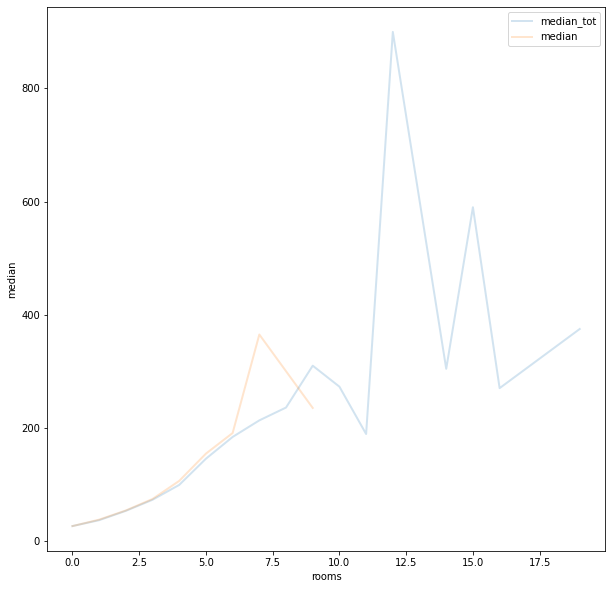

In [27]:
data_living_area_not_skip.columns = ['median_liv', 'median_tot', 'mean_liv', 'mean_tot', 'count_liv', 'count_tot']
data_living_area_skip.columns = ['median', 'mean', 'count']
display(data_living_area_not_skip['median_tot'].plot(x='rooms', y='median_tot',  linewidth=2, alpha=0.2, 
                                                     ylabel='median_tot', figsize=(10, 10), legend=True))
display(data_living_area_skip['median'].plot(x='rooms', y='median',  linewidth=2, alpha=0.2, 
                                             ylabel='median', figsize=(10, 10), legend=True))

<AxesSubplot:xlabel='rooms', ylabel='mean_tot'>

<AxesSubplot:xlabel='rooms', ylabel='mean'>

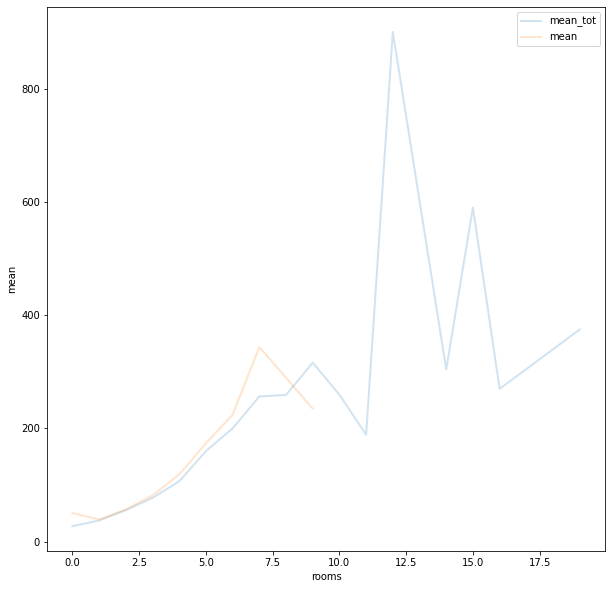

In [28]:
display(data_living_area_not_skip['mean_tot'].plot(x='rooms', y='mean_tot',  linewidth=2, alpha=0.2, 
                                                   ylabel='mean_tot', figsize=(10, 10), legend=True))
display(data_living_area_skip['mean'].plot(x='rooms', y='mean',  linewidth=2, alpha=0.2, 
                                           ylabel='mean', figsize=(10, 10), legend=True))

От 0 до 6 комнат медиана 'total_area' для объявлений с заполненой и пустой 'living_area' практически совпадают, дальше значений мало поэтому расхождение.

Заполним пропуски в 'living_area' медианными значениями 'median_liv' для аналогичного количества 'rooms'.  

In [29]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & 
             (data['living_area'].isna()), ['living_area']] = data.loc[(data['rooms'] == room), 'living_area'].median()

In [30]:
display(data['living_area'].isna().sum())

0

Рассмотрим столбец 'kitchen_area'

In [31]:
data_kitchen_area_not_skip = data.dropna(subset=['kitchen_area']) 
data_kitchen_area_not_skip = data_kitchen_area_not_skip.pivot_table(index='rooms', 
                                                                    values=['total_area', 'kitchen_area'], 
                                                                    aggfunc=['median', 'mean', 'count'])
display(data_kitchen_area_not_skip.head(20))
data_kitchen_area_skip = data[data['kitchen_area'].isna()]
data_kitchen_area_skip = data_kitchen_area_skip.pivot_table(index='rooms', values='total_area', 
                                                            aggfunc=['median', 'mean', 'count'])
display(data_kitchen_area_skip.head(20))

median                    mean                    count           
      kitchen_area total_area kitchen_area  total_area kitchen_area total_area
rooms                                                                         
1             9.01       36.8     9.545510   37.796737         7205       7205
2             8.80       53.0     9.975604   55.833270         7273       7273
3             9.50       72.9    11.306627   77.686403         5366       5366
4            11.05       99.5    13.673160  107.326348         1076       1076
5            15.10      146.9    18.367649  161.081368          285        285
6            19.50      183.7    21.048763  204.240722           97         97
7            20.00      212.0    21.998077  261.026923           52         52
8            25.00      235.0    24.866667  257.722222            9          9
9            14.30      309.7    25.071429  316.114286            7          7
10           19.80      272.6    22.866667  259.566667            3          3
11           12.60      188.9    12.600000  188.900000            2          2
12          112.00      900.0   112.000000  900.000000            1          1
14           21.25      304.2    21.250000  304.200000            2          2
15          100.00      590.0   100.000000  590.000000            1          1
16           13.00      270.0    13.000000  270.000000            1          1
19           27.60      374.6    27.600000  374.600000            1          1

,median,mean,count
,total_area,total_area,total_area
rooms,,,
0,26.05,29.279746,197
1,35.00,36.159771,831
2,53.00,55.942919,651
3,73.00,78.515151,431
4,100.00,111.544949,99
5,127.00,164.209756,41
6,186.65,168.762500,8
7,364.70,297.257143,7


<AxesSubplot:xlabel='rooms', ylabel='median_tot'>

<AxesSubplot:xlabel='rooms', ylabel='median'>

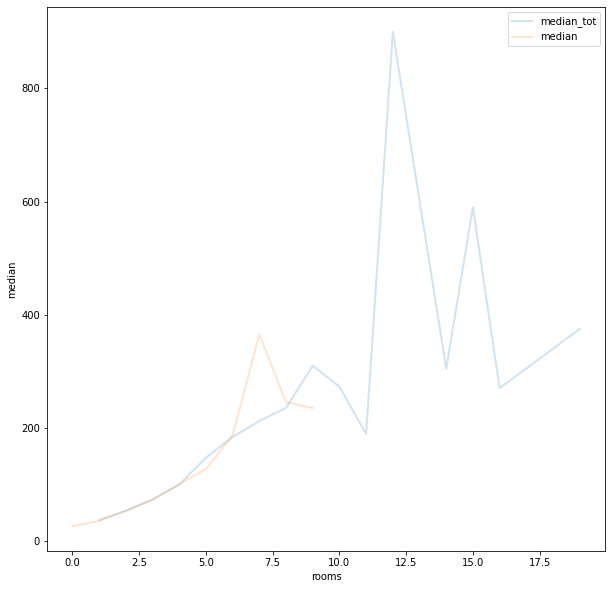

In [32]:
data_kitchen_area_not_skip.columns = ['median_kit', 'median_tot', 'mean_kit', 'mean_tot', 'count_kit', 'count_tot']
data_kitchen_area_skip.columns = ['median', 'mean', 'count']
display(data_kitchen_area_not_skip['median_tot'].plot(x='rooms', y='median_tot',  linewidth=2, 
                                                      alpha=0.2, ylabel='median_tot', figsize=(10, 10), legend=True))
display(data_kitchen_area_skip['median'].plot(x='rooms', y='median',  linewidth=2, 
                                              alpha=0.2, ylabel='median', figsize=(10, 10), legend=True))

<AxesSubplot:xlabel='rooms', ylabel='mean_tot'>

<AxesSubplot:xlabel='rooms', ylabel='mean'>

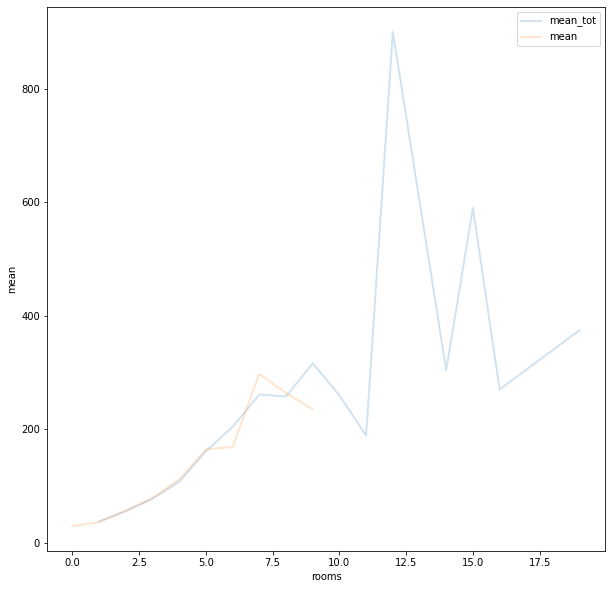

In [33]:
display(data_kitchen_area_not_skip['mean_tot'].plot(x='rooms', y='mean_tot',  linewidth=2, 
                                                    alpha=0.2, ylabel='mean_tot', figsize=(10, 10), legend=True))
display(data_kitchen_area_skip['mean'].plot(x='rooms', y='mean',  linewidth=2, 
                                            alpha=0.2, ylabel='mean', figsize=(10, 10), legend=True))

Ситауция аналогична 'living_area'

Заполним пропуски в 'kitchen_area' медианными значениями 'median_liv' для аналогичного количества 'rooms'.

In [34]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & 
             (data['kitchen_area'].isna()), ['kitchen_area']] = data.loc[(data['rooms'] == room), 'kitchen_area'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [35]:
display(data['kitchen_area'].isna().sum())

197

Остались пропуски для объявлений с 'rooms' == 0, вероятно это 'studio'.

In [36]:
display(data[data['kitchen_area'].isna()].head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category,locality_name_clean
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,False,True,False,NaN,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,Город,Мурино
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Город,Кудрово
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,Город,Санкт-Петербург
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,False,False,True,NaN,1.0,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,п.,Парголово
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,18.00,7,False,True,False,NaN,0.0,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,п.,Шушары
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0,Город,Кудрово
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,True,False,NaN,0.0,поселок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,п.,Шушары
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,18.00,8,False,False,True,NaN,1.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Город,Мурино
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.00,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,п.,Новый Свет
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.00,7,False,False,True,NaN,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0,Город,Мурино


In [37]:
data_1 = data.pivot_table(index='studio', values=['total_area', 'kitchen_area'], aggfunc=['min', 'median', 'mean', 'max', 'count'])
display(data_1)

min                  median                    mean  \
       kitchen_area total_area kitchen_area total_area kitchen_area   
studio                                                                
False          1.30       12.0         9.01       52.0    10.461143   
True           9.01       15.5         9.01       26.0     9.010000   

                           max                   count             
       total_area kitchen_area total_area kitchen_area total_area  
studio                                                             
False   60.535416       112.00      900.0        23442      23501  
True    27.783154         9.01       98.4           11        149

In [38]:
display(data.query('studio == True & kitchen_area > 0'))
display(len(data.query('studio == True & kitchen_area > 0'))) 
display(len(data.query('studio == True & kitchen_area.isna()')))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category,locality_name_clean
2389,5,2250000.0,25.41,2016-06-07T00:00:00,1,NaN,12.0,17.08,8,False,True,False,9.01,2.0,Санкт-Петербург,14125.0,12921.0,2.0,328.0,2.0,485.0,26.0,Город,Санкт-Петербург
3187,13,3800000.0,27.00,2016-05-17T00:00:00,1,NaN,14.0,18.00,8,False,True,False,9.01,2.0,Санкт-Петербург,50348.0,16053.0,0.0,NaN,0.0,NaN,45.0,Город,Санкт-Петербург
4180,4,4500000.0,34.00,2016-04-25T00:00:00,1,2.8,10.0,21.00,10,False,True,False,9.01,2.0,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,62.0,Город,Санкт-Петербург
8683,10,3500000.0,32.50,2016-05-05T00:00:00,1,3.0,23.0,29.90,11,False,True,False,9.01,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0,Город,Санкт-Петербург
11026,1,2800000.0,28.00,2016-05-04T00:00:00,1,NaN,26.0,19.00,6,False,True,False,9.01,2.0,поселок Парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,45.0,п.,Парголово
12935,10,2200000.0,31.00,2016-05-15T00:00:00,1,2.5,8.0,22.30,5,False,True,False,9.01,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,44.0,г. п.,Никольское
15142,2,2700000.0,30.00,2016-05-10T00:00:00,1,NaN,21.0,26.00,6,False,True,False,9.01,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Город,Кудрово
18732,4,2400000.0,22.00,2016-05-06T00:00:00,1,NaN,10.0,15.00,6,False,True,False,9.01,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Город,Кудрово
20086,0,1550000.0,22.00,2016-05-11T00:00:00,1,2.7,15.0,10.94,14,False,True,False,9.01,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,45.0,г. п.,Никольское
21702,9,2349000.0,23.40,2016-05-19T00:00:00,1,2.7,20.0,16.00,8,False,True,False,9.01,1.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,34.0,д.,Новое Девяткино


11

138

Для 11-ти строк studio где была указана rooms==1, kitchen_area добавиласть, но это значение некорректно. Также для некоторых строк living_area + kitchen_area > total_area, что неккоректно.

Для всех studio укажем kitchen_area = 0.

In [39]:
data.loc[data['studio'] == True , 'kitchen_area'] = 0
display(data['kitchen_area'].isna().sum())

59

Остались пропуски, продолжаем обработку

In [40]:
display(data.query('studio == True & kitchen_area > 0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category,locality_name_clean


In [41]:
display(data[data['kitchen_area'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category,locality_name_clean
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Город,Кудрово
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,False,False,True,NaN,1.0,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,п.,Парголово
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,18.0,8,False,False,True,NaN,1.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Город,Мурино
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,п.,Новый Свет
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,False,False,True,NaN,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0,Город,Мурино
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,False,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0,Город,Кудрово
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,False,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0,п. ж/д ст.,Корнево
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,False,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0,Город,Санкт-Петербург
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,False,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Город,Сертолово
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,False,False,True,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0,Город,Санкт-Петербург


In [42]:
display(data.query('open_plan == True'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category,locality_name_clean
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.000,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Город,Кудрово
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.300,19,False,False,True,NaN,1.0,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,п.,Парголово
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,18.000,8,False,False,True,NaN,1.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Город,Мурино
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.000,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,п.,Новый Свет
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.000,7,False,False,True,NaN,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0,Город,Мурино
1379,3,6000000.0,44.20,2015-11-10T00:00:00,1,NaN,25.0,17.400,23,False,False,True,9.01,1.0,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,231.0,Город,Санкт-Петербург
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.000,16,False,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0,Город,Кудрово
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.500,3,False,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0,п. ж/д ст.,Корнево
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.700,9,False,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0,Город,Санкт-Петербург
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.000,6,False,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Город,Сертолово


In [43]:
display(len(data.query('open_plan == True')))

67

Оставшиеся пропуски это open_plan и также для указанного rooms нами заполнены медианы- что некорректно. Удалим все строки open_plan == True

In [44]:
data = data.query('open_plan == False')
display(len(data))
display(data['kitchen_area'].isna().sum())

23583

0

Рассмотрим 'airports_nearest'

In [45]:
data_airports_nearest_not_skip = data.dropna(subset=['airports_nearest']) 
data_airports_nearest_not_skip_2 = data_airports_nearest_not_skip.pivot_table(index=['locality_name_clean', 'town_category'], 
                                                                              values=['total_area', 'airports_nearest'], 
                                                                              aggfunc=['median', 'count'])
display(data_airports_nearest_not_skip_2.head(50))
data_airports_nearest_skip = data[data['airports_nearest'].isna()]
data_airports_nearest_skip_2 = data_airports_nearest_skip.pivot_table(index=['locality_name_clean', 'town_category'], 
                                                                      values='total_area', aggfunc=['median', 'count'])
display(data_airports_nearest_skip_2.head(50))

median             \
                                  airports_nearest total_area   
locality_name_clean town_category                               
Александровская     п.                     12896.5     118.50   
Белоостров          п.                     57769.0      36.00   
Зеленогорск         Город                  72282.0      46.30   
Колпино             Город                  26232.0      50.00   
Красное Село        Город                  25715.5      45.15   
Кронштадт           Город                  67850.0      46.90   
Левашово            п.                     52693.0      43.30   
Лисий Нос           п.                     55909.0      40.00   
Ломоносов           Город                  48415.5      46.15   
Металлострой        п.                     25758.0      47.70   
Молодежное          п.                     84665.0      51.40   
Мурино              Город                  51553.0      35.18   
Павловск            Город                  20529.5      54.75   
Парголово           п.                     53426.0      43.00   
Песочный            п.                     54831.5      38.15   
Петергоф            Город                  39231.0      47.00   
Петро-Славянка      п.                     20605.0      27.00   
Понтонный           п.                     30642.0      44.00   
Пушкин              Город                  15766.0      53.20   
Репино              п.                     61797.5     108.00   
Санкт-Петербург     Город                  26766.0      55.00   
Саперный            п.                     34147.5      41.85   
Сестрорецк          Город                  56692.0      57.00   
Стрельна            п.                     28317.0      46.15   
Усть-Ижора          п.                     26510.5      55.50   
Шушары              п.                     17427.0      50.35   
Щеглово             п.                     61908.0      23.98   

                                             count             
                                  airports_nearest total_area  
locality_name_clean town_category                              
Александровская     п.                           2          2  
Белоостров          п.                           1          1  
Зеленогорск         Город                       24         24  
Колпино             Город                      336        336  
Красное Село        Город                      176        176  
Кронштадт           Город                       95         95  
Левашово            п.                           1          1  
Лисий Нос           п.                           3          3  
Ломоносов           Город                      132        132  
Металлострой        п.                          66         66  
Молодежное          п.                           5          5  
Мурино              Город                        2          2  
Павловск            Город                       38         38  
Парголово           п.                         324        324  
Песочный            п.                           4          4  
Петергоф            Город                      201        201  
Петро-Славянка      п.                           1          1  
Понтонный           п.                          20         20  
Пушкин              Город                      369        369  
Репино              п.                           4          4  
Санкт-Петербург     Город                    15603      15603  
Саперный            п.                           6          6  
Сестрорецк          Город                      183        183  
Стрельна            п.                          44         44  
Усть-Ижора          п.                           2          2  
Шушары              п.                         436        436  
Щеглово             п.                           1          1

,,median,count
,,total_area,total_area
locality_name_clean,town_category,,
Агалатово,д.,45.50,4
Алексеевка,п.,45.00,1
Аннино,п.,45.50,16
Аро,д.,58.60,3
Барышево,п.,62.60,2
Батово,д.,58.00,9
Бегуницы,д.,54.30,17
Белогорка,д.,41.00,11


Пропуски в расстоянии до аэропорта связаны с наименованием населеного пункта. Значения правдоподобны.

In [46]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9108
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5504
city_centers_nearest     5481
parks_around_3000        5480
parks_nearest           15530
ponds_around_3000        5480
ponds_nearest           14522
days_exposition          3180
town_category               0
locality_name_clean         0
dtype: int64

Мы заполнили пропуски в living_area и kitchen_area  медианными значениями, в соответсвии с rooms, возникли сложности с studio и open_plan, open_plan - удалили. Возможно для более выразительной коррляции параметров стоит удалить studio и is_apartment. Но пока оставим. 

Информация по расстоянию до аэропорта, центра города, парков и водоемов указана для Санкт-Петербурга. Для Ленинградской области эта информация пропущена. 

В рамках данного исследования восстановить в ручную можно расстояние до аэропорта, наличие  парка и водоема в радиусе 3000 м для большинства населенных пунктов, но это выходит за наши рамки и очень трудоемко, оставим как есть.

### Меняем типы данных

In [48]:
data['last_price'] = data['last_price'].astype('int', errors='ignore')
data['balcony'] = data['balcony'].astype('int', errors='ignore')
data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()
data.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23583 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23583 non-null  int64         
 1   last_price            23583 non-null  int64         
 2   total_area            23583 non-null  float64       
 3   first_day_exposition  23583 non-null  datetime64[ns]
 4   rooms                 23583 non-null  int64         
 5   ceiling_height        14475 non-null  float64       
 6   floors_total          23498 non-null  float64       
 7   living_area           23583 non-null  float64       
 8   floor                 23583 non-null  int64         
 9   is_apartment          23583 non-null  bool          
 10  studio                23583 non-null  bool          
 11  open_plan             23583 non-null  bool          
 12  kitchen_area          23583 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category,locality_name_clean
23689,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,Город,Санкт-Петербург
23690,3,5500000,52.00,2018-07-19,2,NaN,5.0,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,Город,Санкт-Петербург
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,Город,Санкт-Петербург
23692,2,1350000,30.00,2017-07-07,1,NaN,5.0,17.5,4,False,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,Город,Тихвин
23693,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,False,False,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,Город,Петергоф
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,Город,Санкт-Петербург
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Город,Тосно
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,False,False,8.80,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,с.,Рождествено
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,30.5,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Город,Санкт-Петербург
23698,4,1350000,32.30,2017-07-21,1,2.50,5.0,12.3,1,False,False,False,9.00,0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN,п.,Новый Учхоз


Приводим 'last_price', 'balcony', 'days_exposition' к целому числу.

И 'first_day_exposition' к формату даты для дальнейшей работы.

Заполнить пропуски в 'days_exposition' - не возможно.

## Добавляем в таблицу новые столбцы

Добавим стобцы с ценой одного м2 'price_per_m2' - 'last_price'/'total_area'

День недели публикации - 'weekday'

Месяц публикации - 'month'

Год публикации - 'year'

Расстояние до центра города - 'city_centers_km'

Тип этажа квартиры - 'category'

In [49]:
def categorize_floor(row):
    try:
        floor = row['floor']
        floors_total = row['floors_total'] 
        if floor == 1:
            return 'первый'
        if floor == floors_total:
            return 'последний'
        if 1 < floor < floors_total:
            return 'другой'        
        return 'неопределен'
    except:
        pass

In [50]:
data['price_per_m2'] = (data['last_price'] / data['total_area']).round(2)
data['ex_weekday'] = data['first_day_exposition'].dt.weekday
data['ex_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['ex_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['city_centers_km'] = (data['city_centers_nearest'] / 1000).round(0)
data['floor_category'] = data.apply(categorize_floor, axis=1)

In [51]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23583 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23583 non-null  int64         
 1   last_price            23583 non-null  int64         
 2   total_area            23583 non-null  float64       
 3   first_day_exposition  23583 non-null  datetime64[ns]
 4   rooms                 23583 non-null  int64         
 5   ceiling_height        14475 non-null  float64       
 6   floors_total          23498 non-null  float64       
 7   living_area           23583 non-null  float64       
 8   floor                 23583 non-null  int64         
 9   is_apartment          23583 non-null  bool          
 10  studio                23583 non-null  bool          
 11  open_plan             23583 non-null  bool          
 12  kitchen_area          23583 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category,locality_name_clean,price_per_m2,ex_weekday,ex_month,ex_year,city_centers_km,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Город,Санкт-Петербург,120370.37,3,3,2019,16.0,другой
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,п.,Шушары,82920.79,1,12,2018,19.0,первый
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Город,Санкт-Петербург,92785.71,3,8,2015,14.0,другой
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,45.00,9,False,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Город,Санкт-Петербург,408176.10,4,7,2015,7.0,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Город,Санкт-Петербург,100000.00,1,6,2018,8.0,другой
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,г. п.,Янино-1,95065.79,0,9,2018,NaN,другой
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,п.,Парголово,99195.71,3,11,2017,19.0,другой
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Город,Санкт-Петербург,110544.69,3,4,2019,12.0,другой
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Город,Мурино,87454.76,2,5,2018,NaN,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Город,Санкт-Петербург,88524.59,6,2,2017,15.0,другой


Проверим на полные дубликаты

In [52]:
data.duplicated().sum()

0

## Проведите исследовательский анализ данных

### Изучаем параметры объектов

In [53]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_m2,ex_weekday,ex_month,ex_year,city_centers_km
count,23583.000000,2.358300e+04,23583.000000,23583.000000,14475.000000,23498.000000,23583.000000,23583.000000,23583.000000,23583.000000,18079.000000,18102.000000,18103.000000,8053.000000,18103.000000,9061.000000,20403.000000,2.358300e+04,23583.000000,23583.000000,23583.000000,18102.000000
mean,9.869737,6.546239e+06,60.395376,2.075139,2.728383,10.657971,34.350398,5.883942,10.395163,0.590044,28811.015709,14199.512209,0.611943,490.696386,0.769320,518.107714,181.056707,9.941009e+04,2.567655,6.396769,2017.371200,14.193073
std,5.681276,1.089853e+07,35.608632,1.074821,0.305882,6.585181,21.720014,4.873218,5.706266,0.959412,12636.650264,8611.074830,0.802125,342.631376,0.937934,277.845599,219.978391,5.037092e+04,1.789179,3.489899,1.038495,8.618866
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.434500e+06,40.000000,1.000000,2.510000,5.000000,18.400000,2.000000,7.200000,0.000000,18580.000000,9241.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.656250e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.400000,4.000000,9.010000,0.000000,26763.000000,13106.000000,0.000000,454.000000,1.000000,502.000000,96.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.700000,8.000000,11.500000,1.000000,37310.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,232.000000,1.142351e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


Проанализируем распределение предложений по столбцу 'total_area' в разных масштабах

<AxesSubplot:>

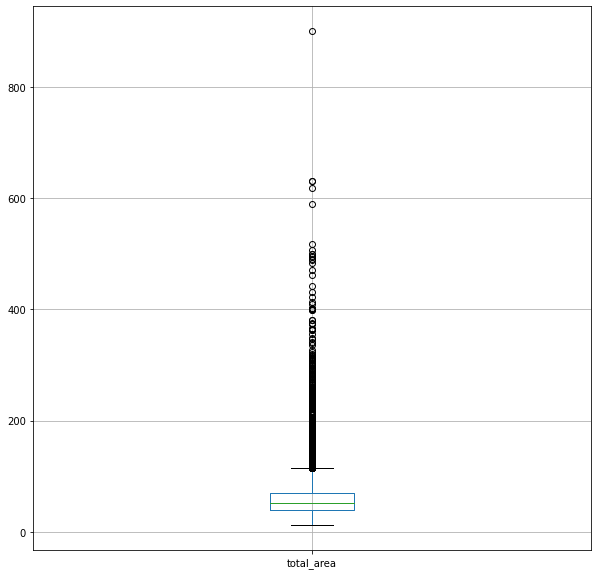

In [54]:
display(data.boxplot(['total_area'], figsize=(10, 10)))

<AxesSubplot:ylabel='Frequency'>

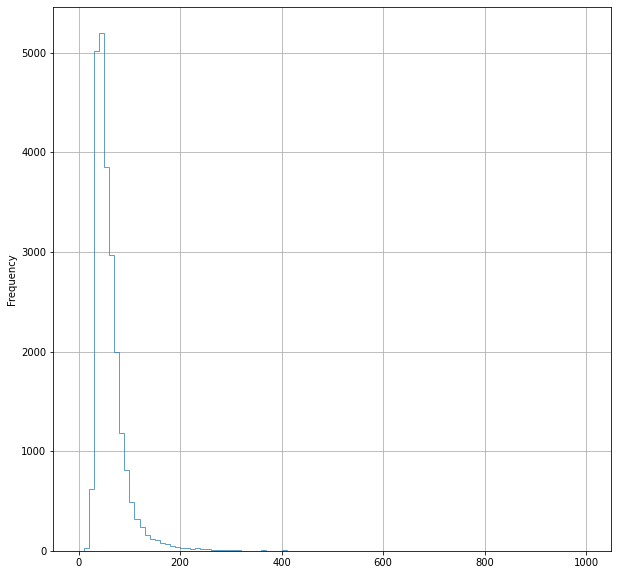

In [55]:
display(data['total_area'].plot(kind='hist', histtype='step', range=(0, 1000), bins=100, linewidth=1, 
                                alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

<AxesSubplot:ylabel='Frequency'>

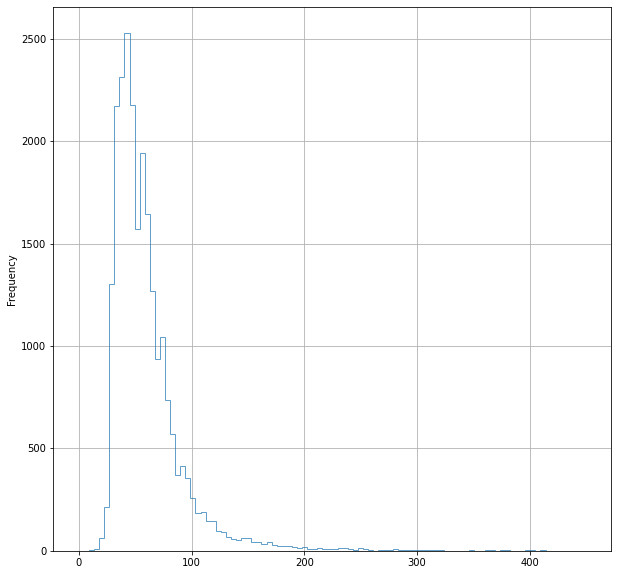

In [56]:
display(data['total_area'].plot(kind='hist', histtype='step', range=(0, 450), bins=100, linewidth=1, 
                                alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

<AxesSubplot:ylabel='Frequency'>

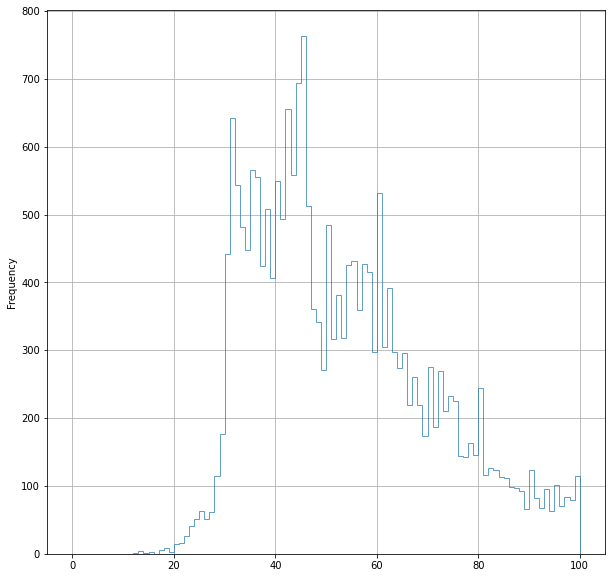

In [57]:
display(data['total_area'].plot(kind='hist', histtype='step', range=(0, 100), bins=100, linewidth=1, 
                                alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

Удалим редкие по площади предложения. Оставим в выборке удовлетворяющие 20 <= 'total_area' <= 400

In [59]:
data = data[(data['total_area'] >= 20) & (data['total_area'] <= 400)]
display(len(data))

23534

Проанализируем распределение предложений по столбцу 'living_area' в разных масштабах

<AxesSubplot:>

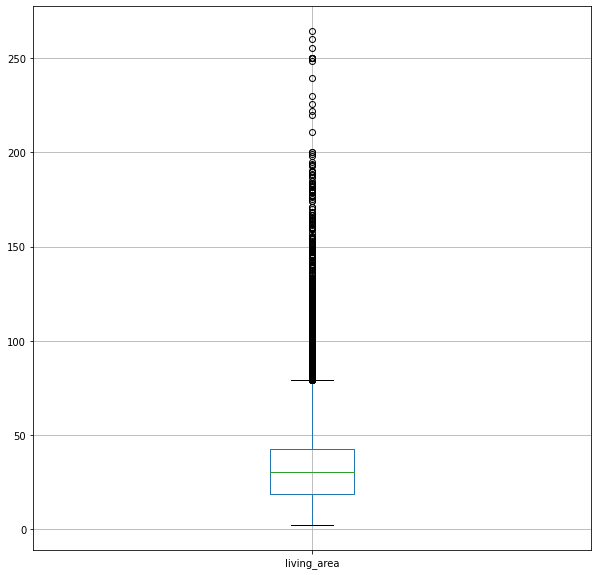

In [60]:
data.boxplot(['living_area'], figsize=(10, 10))

<AxesSubplot:ylabel='Frequency'>

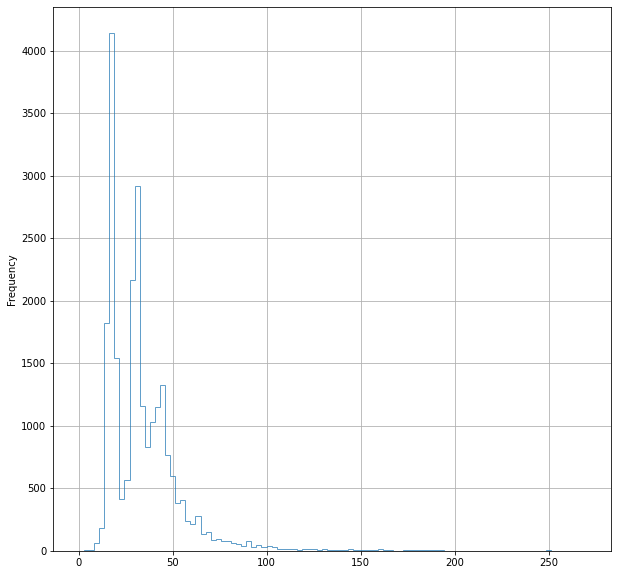

In [61]:
display(data['living_area'].plot(kind='hist', histtype='step', range=(0, 270), bins=100, linewidth=1, 
                                 alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

<AxesSubplot:ylabel='Frequency'>

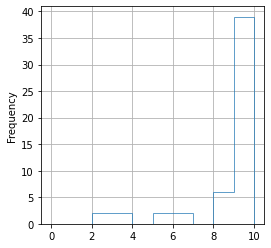

In [62]:
display(data['living_area'].plot(kind='hist', histtype='step', range=(0, 10), bins=10, linewidth=1, 
                                 alpha=0.7, label='raw', grid=True, figsize=(4, 4)))

Удалим редкие по 'living_area' предложения. Удалим 'living_area' < 8

In [63]:
data_1 = data[data['living_area'] >= 8]
data_2 = data[data['living_area'].isna()]
data = pd.concat([data_1, data_2], ignore_index=True)
display(len(data))

23526

Проанализируем распределение предложений по столбцу 'kitchen_area' в разных масштабах

<AxesSubplot:>

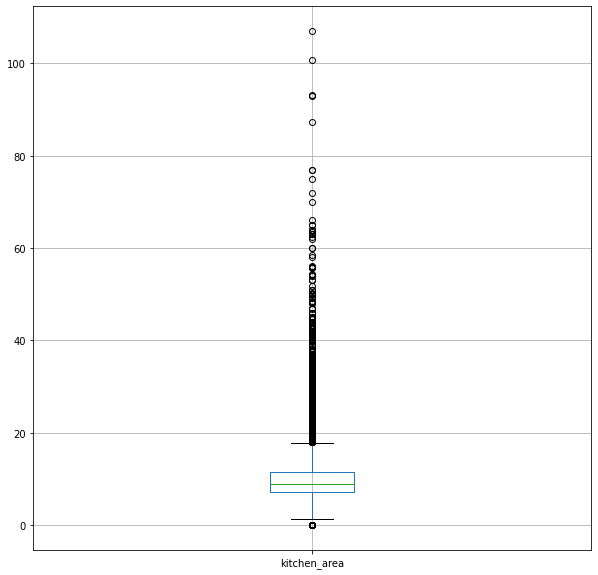

In [64]:
data.boxplot(['kitchen_area'], figsize=(10, 10))

<AxesSubplot:ylabel='Frequency'>

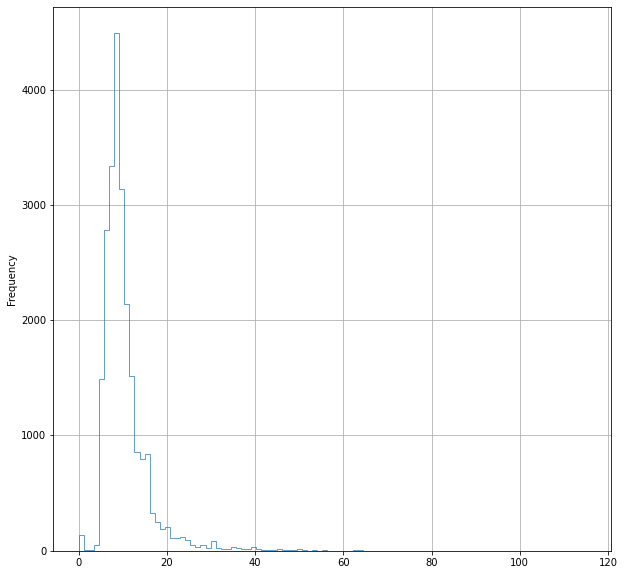

In [65]:
display(data['kitchen_area'].plot(kind='hist', histtype='step', range=(0, 115), bins=100, linewidth=1, 
                                  alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

<AxesSubplot:ylabel='Frequency'>

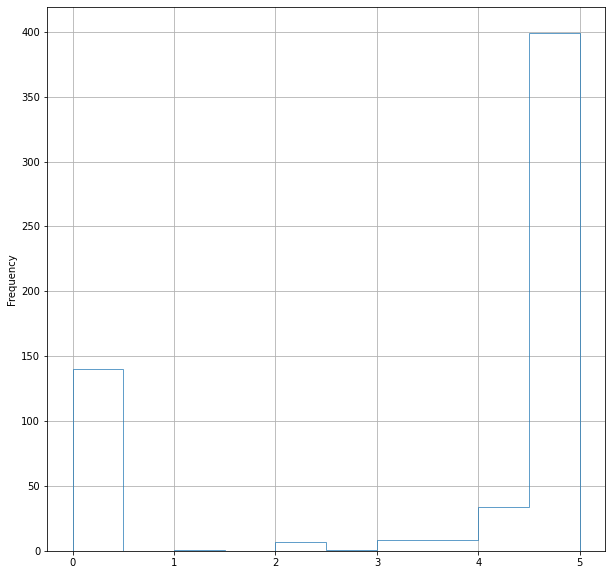

In [66]:
display(data['kitchen_area'].plot(kind='hist', histtype='step', range=(0, 5), bins=10, linewidth=1, 
                                  alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

Удалим 'kitchen_area' < 4.5, сюда входят и студии их следует рассматривать отдельно

In [67]:
data_1 = data[data['kitchen_area'] >= 4.5]
data_2 = data[data['kitchen_area'].isna()]
data = pd.concat([data_1, data_2], ignore_index=True)

Проанализируем распределение предложений по столбцу 'last_price' в разных масштабах

<AxesSubplot:>

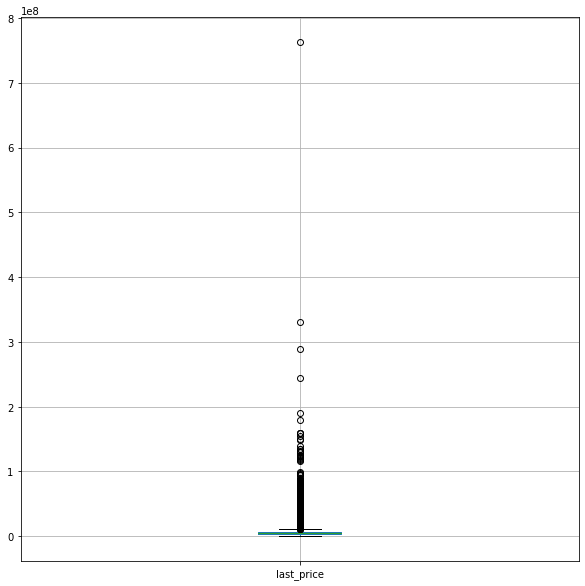

In [68]:
data.boxplot(['last_price'], figsize=(10, 10))

<AxesSubplot:ylabel='Frequency'>

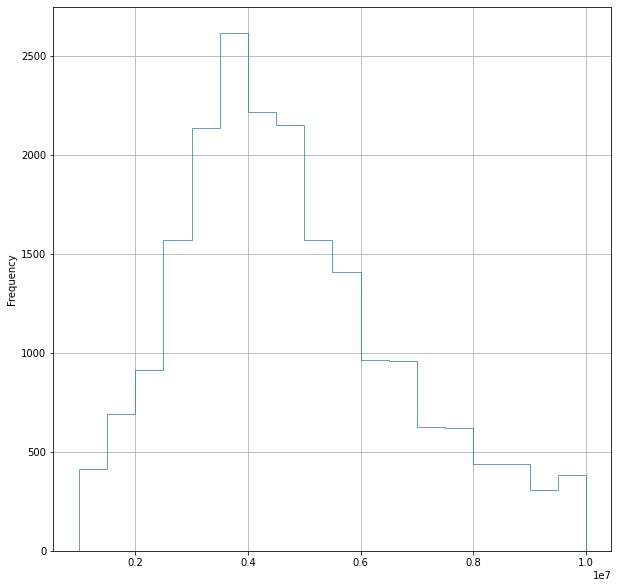

In [69]:
display(data['last_price'].plot(kind='hist', histtype='step', range=(1_000_000, 10_000_000), bins=18, 
                                linewidth=1, alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

<AxesSubplot:ylabel='Frequency'>

28

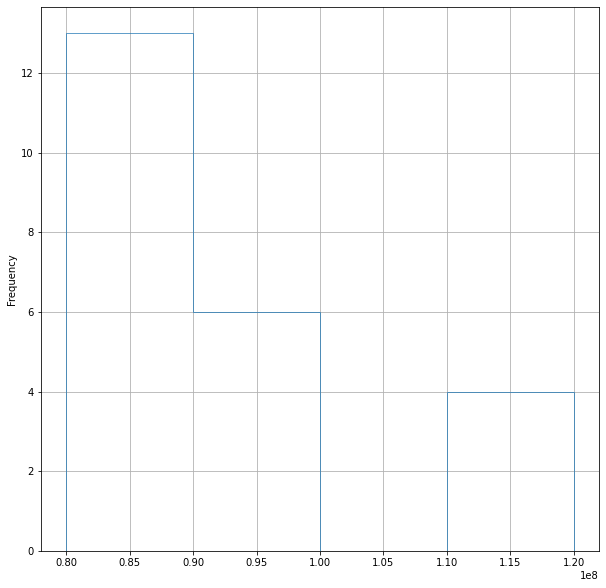

In [70]:
display(data['last_price'].plot(kind='hist', histtype='step', range=(80_000_000, 120_000_000), bins=4, 
                                linewidth=1, alpha=0.7, label='raw', grid=True, figsize=(10, 10)))
display(len(data[data['last_price'] > 100_000_000]))

<AxesSubplot:ylabel='Frequency'>

223

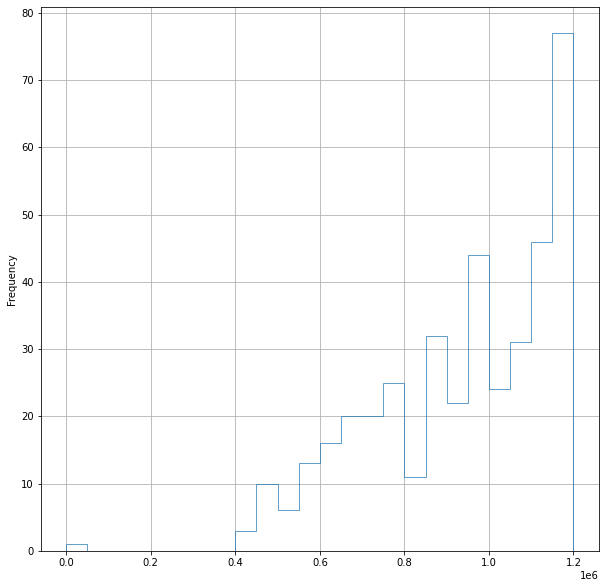

In [71]:
display(data['last_price'].plot(kind='hist', histtype='step',range=(0, 1_200_000), bins=24, 
                                linewidth=1, alpha=0.7, label='raw', grid=True, figsize=(10, 10)))
display(len(data[data['last_price'] < 1_000_000]))

Удалим редкие по цене. Оставим в выборке удовлетворяющие 400_000 <= 'last_price' <= 100_000_000

In [72]:
data = data[(data['last_price'] >= 400_000) & (data['last_price'] <= 100_000_000)]
display(len(data))

23298

Проанализируем распределение предложений по столбцу 'rooms' в разных масштабах

<AxesSubplot:>

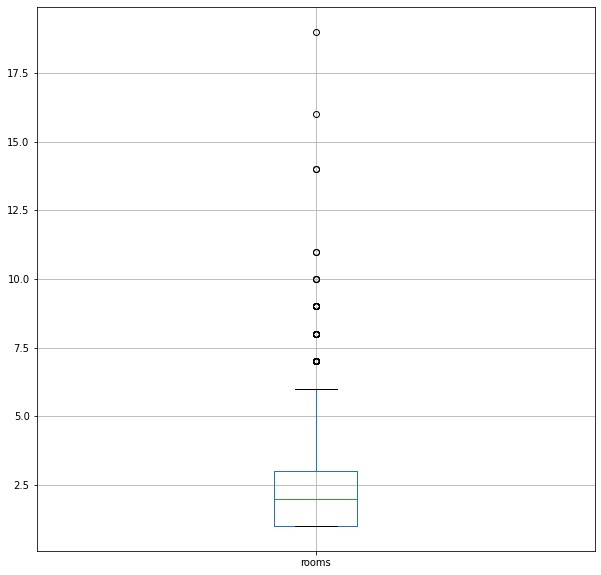

In [73]:
data.boxplot(['rooms'], figsize=(10, 10))

<AxesSubplot:ylabel='Frequency'>

6

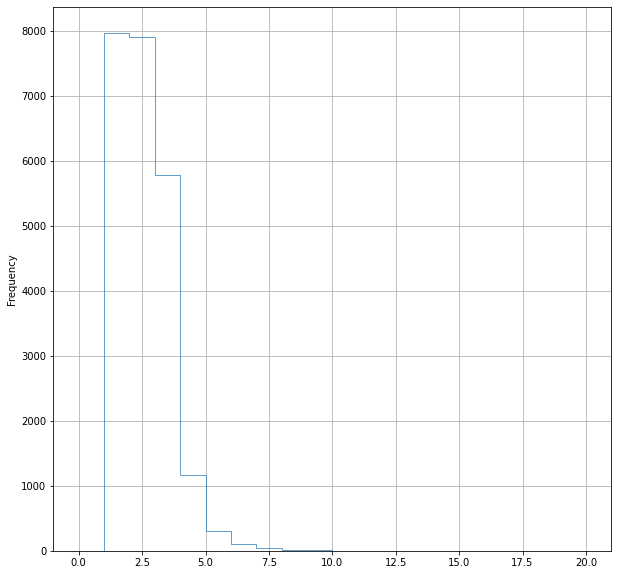

In [74]:
display(data['rooms'].plot(kind='hist', histtype='step',range=(0, 20), bins=20, 
                           linewidth=1, alpha=0.7, label='raw', grid=True, figsize=(10, 10)))
display(len(data[data['rooms'] > 10]))

Удалим строки с числом комнат больше 10.

In [75]:
data = data[(data['rooms'] <= 10)]
display(len(data))
display(len(data[data['rooms'] > 10]))

23292

0

Проанализируем распределение предложений по столбцу 'ceiling_height' в разных масштабах. Частично этот вопрос рассматривался ранее.

<AxesSubplot:>

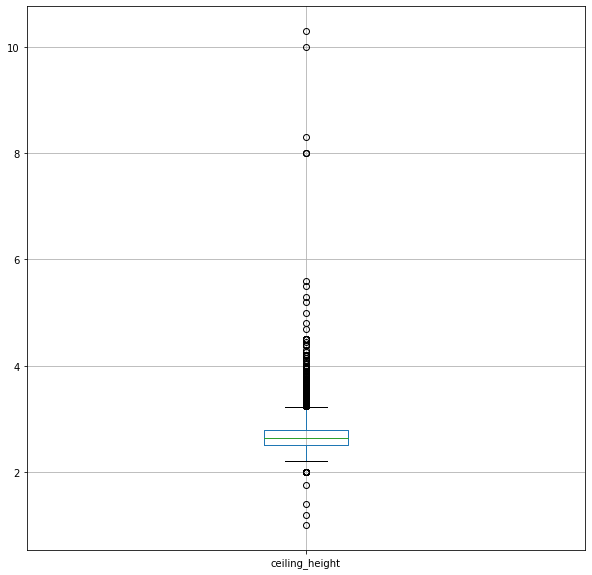

In [76]:
data.boxplot(['ceiling_height'], figsize=(10, 10))

<AxesSubplot:ylabel='Frequency'>

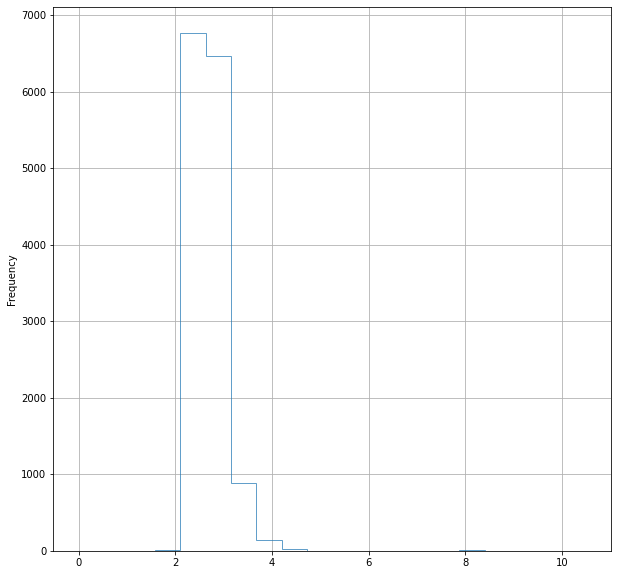

In [77]:
display(data['ceiling_height'].plot(kind='hist', histtype='step',range=(0, 10.5), bins=20, linewidth=1, 
                                    alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

Удалим строки с высотой потолка меньше или равно 2,0 м и больше 6,0 м

In [78]:
data_1 = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] <= 6)]
data_2 = data[data['ceiling_height'].isna()]
display(len(data_1))
display(len(data_2))
data = pd.concat([data_1, data_2], ignore_index=True)
display(len(data))

14286

8984

23270

Рассмотрим 'floor_category' и 'floors_total', ранее мы обнаружили несуществующие по этажности дома. Самое высокое жилое здание 37 этажей (38 с техническим)

In [79]:
display(data.pivot_table(index='floor_category', values=['floor', 'floors_total'], aggfunc=['min', 'max', 'count']))

min                max               count             
               floor floors_total floor floors_total  floor floors_total
floor_category                                                          
другой             2          3.0    33         60.0  17055        17055
неопределен        2          NaN    24          NaN     78            0
первый             1          1.0     1         27.0   2860         2857
последний          2          2.0    27         27.0   3277         3277

<AxesSubplot:>

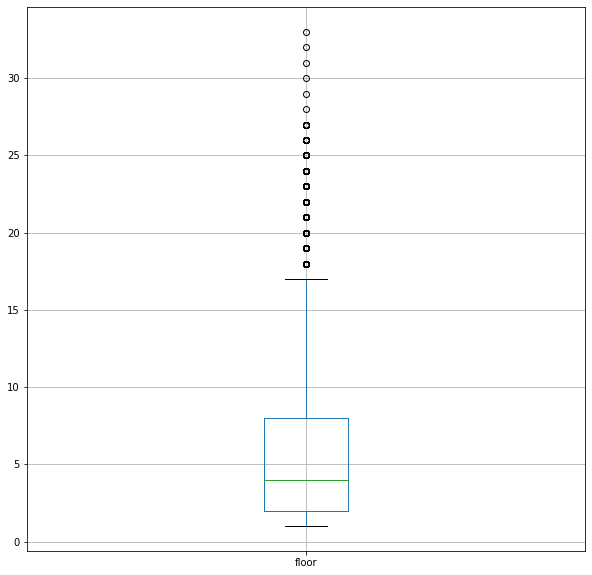

In [80]:
data.boxplot(['floor'], figsize=(10, 10))

<AxesSubplot:ylabel='Frequency'>

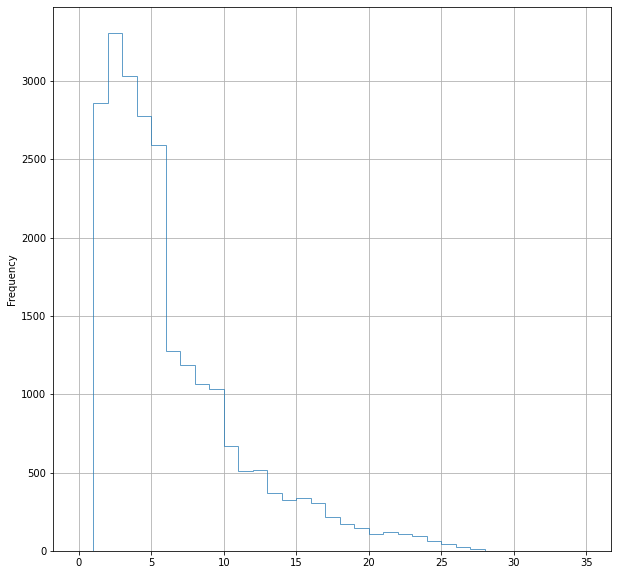

In [81]:
display(data['floor'].plot(kind='hist', histtype='step',range=(0, 35), bins=35, linewidth=1, alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

<AxesSubplot:>

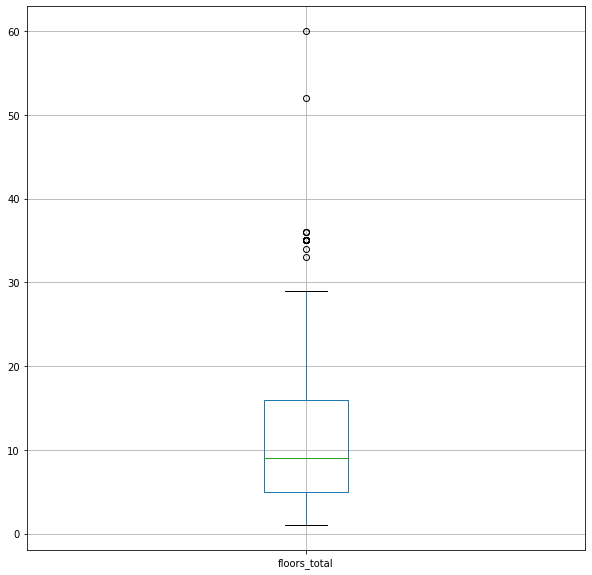

In [82]:
data.boxplot(['floors_total'], figsize=(10, 10))

<AxesSubplot:ylabel='Frequency'>

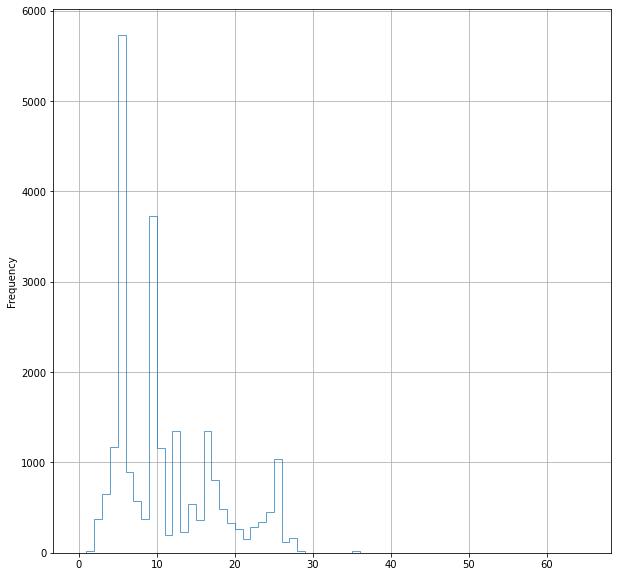

In [83]:
display(data['floors_total'].plot(kind='hist', histtype='step',range=(0, 65), bins=65, linewidth=1, alpha=0.7, 
                                  label='raw', grid=True, figsize=(10, 10)))

In [84]:
display(data[data['floors_total'] >= 38])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category,locality_name_clean,price_per_m2,ex_weekday,ex_month,ex_year,city_centers_km,floor_category
1358,12,3800000,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,Город,Кронштадт,83516.48,3,6,2018,49.0,другой
10131,9,3978000,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,Город,Санкт-Петербург,99450.00,0,9,2018,13.0,другой


Определить корректное значение 'floors_total' не получается, удалим эти строки. Пустые строки оставим.

In [85]:
data_1 = data[data['floors_total'] < 38]
data_2 = data[data['floors_total'].isna()]
data = pd.concat([data_1, data_2], ignore_index=True)
display(len(data))

23268

Рассмотрим 'city_centers_nearest'

<AxesSubplot:ylabel='Frequency'>

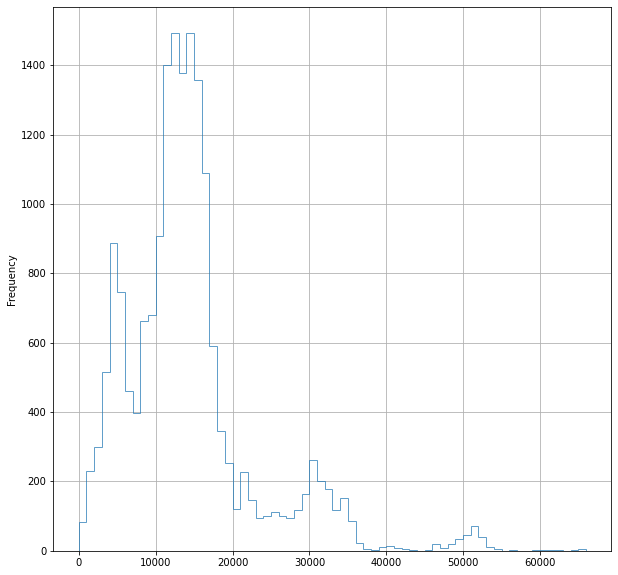

In [86]:
display(data['city_centers_nearest'].plot(kind='hist', histtype='step',range=(0, 66000), bins=66, linewidth=1, 
                                          alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

In [87]:
data_city_centers_nearest_not_skip = data.dropna(subset=['city_centers_nearest']) 
data_city_centers_nearest_not_skip = data_city_centers_nearest_not_skip.pivot_table(index=['locality_name_clean', 'town_category'], 
                                                                                    values='city_centers_nearest', 
                                                                                    aggfunc=['min', 'max', 'count'])
display(data_city_centers_nearest_not_skip.head(50))
data_city_centers_nearest_skip = data[data['city_centers_nearest'].isna()]
data_city_centers_nearest_skip = data_city_centers_nearest_skip.pivot_table(index=['locality_name_clean', 'town_category'], 
                                                                            values='city_centers_nearest', 
                                                                            aggfunc=['min', 'max', 'count'])
display(data_city_centers_nearest_skip.head(50))

,,min,max,count
,,city_centers_nearest,city_centers_nearest,city_centers_nearest
locality_name_clean,town_category,,,
Александровская,п.,27352.0,27584.0,2
Белоостров,п.,38868.0,38868.0,1
Зеленогорск,Город,51115.0,62706.0,24
Колпино,Город,29436.0,37477.0,336
Красное Село,Город,27317.0,41792.0,175
Кронштадт,Город,46657.0,51511.0,93
Левашово,п.,25727.0,25727.0,1
Лисий Нос,п.,26368.0,28246.0,3


,,count
,,city_centers_nearest
locality_name_clean,town_category,
Агалатово,д.,0
Алексеевка,п.,0
Аннино,п.,0
Аро,д.,0
Барышево,п.,0
Батово,д.,0
Бегуницы,д.,0
Белогорка,д.,0


Просадка на 7-8 км от центра - "Серый пояс"-старые промышленные районы, сейчас активно застраиваются. Пик  на 12-15 км спальные районы. Последующие всплески отдельные населенные пункты входящие в субъект "Санкт-Петербург". Для Ленинградской области данных нет. Расстояние указано по дорогам. 

Рассмотрим 'parks_nearest'

<AxesSubplot:>

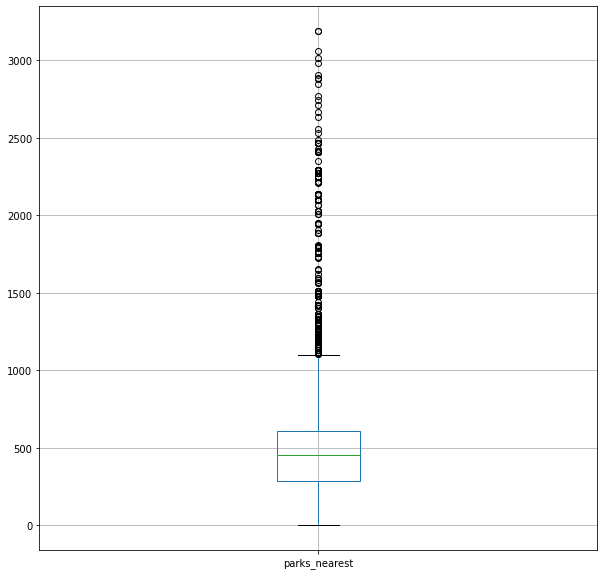

In [88]:
data.boxplot(['parks_nearest'], figsize=(10, 10))

7959

<AxesSubplot:ylabel='Frequency'>

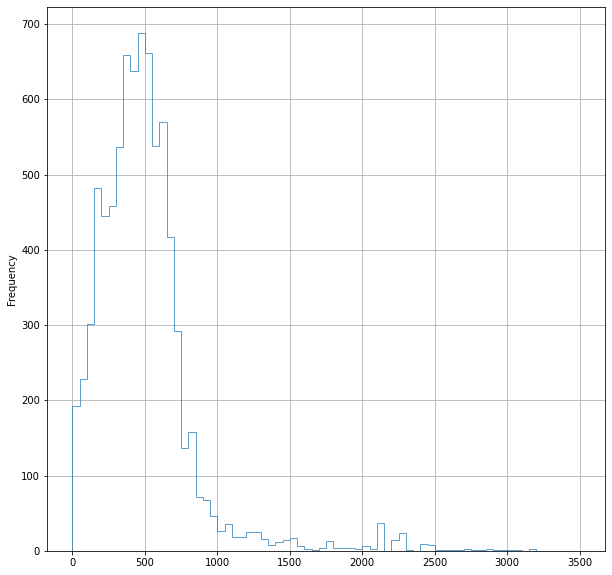

In [89]:
display(len(data[data['parks_nearest'] >= 0]))
display(data['parks_nearest'].plot(kind='hist', histtype='step',range=(0, 3500), bins=70, linewidth=1, 
                                   alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

**Ближайшие парки описаны некорректно**, как упоминалось в начале. Возможно значения надо умножить на 10, но это тоже не правдоподобно. В таком виде эти данные можно трактовать так *Если столбец  заполнен значит в 10 минутах хотьбы есть парк* 

<AxesSubplot:ylabel='Frequency'>

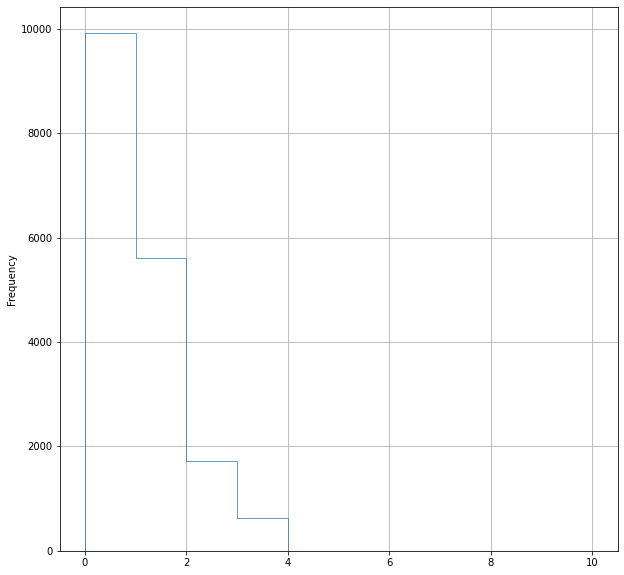

In [90]:
display(data['parks_around_3000'].plot(kind='hist', histtype='step',range=(0, 10), bins=10, 
                                       linewidth=1, alpha=0.7, label='raw', grid=True, figsize=(10, 10)))

### Рассмотрим столбец 'days_exposition' - скорость продажы квартир

<AxesSubplot:>

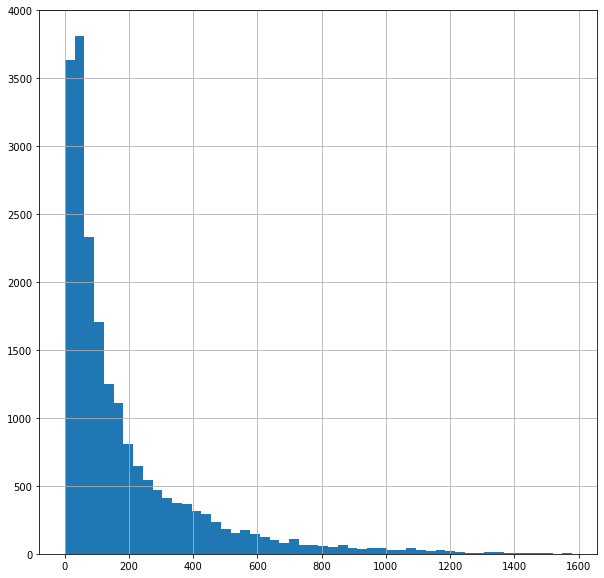

In [91]:
display(data['days_exposition'].hist(bins=52, range=(0, 1580), grid=True, figsize=(10, 10)))

<AxesSubplot:>

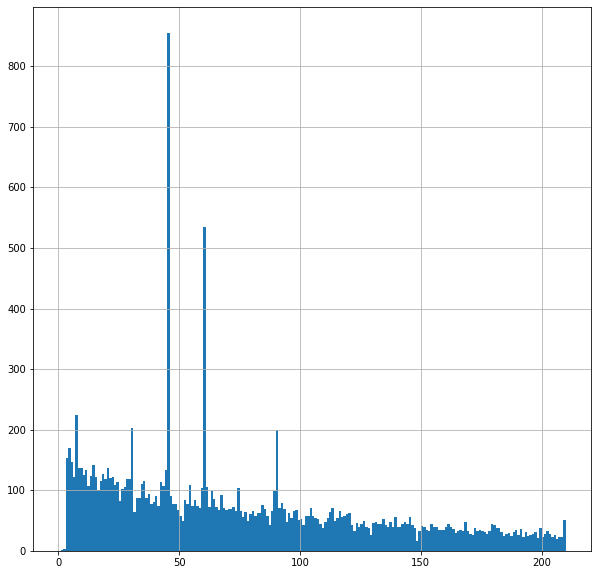

In [92]:
display(data['days_exposition'].hist(bins=210, range=(0, 210), grid=True, figsize=(10, 10)))

<AxesSubplot:>

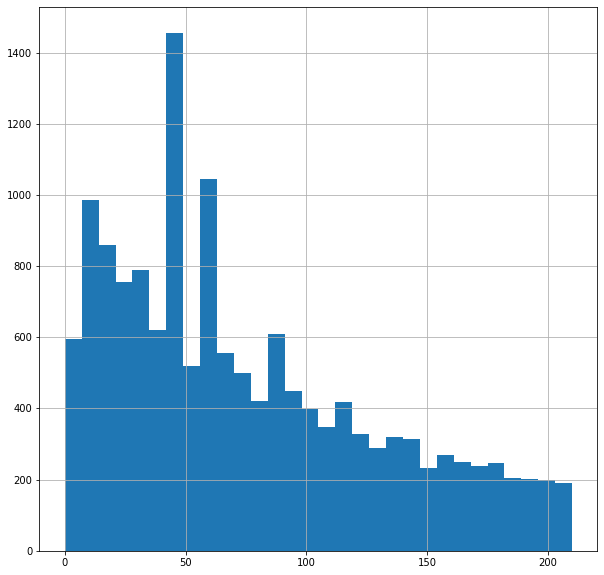

In [93]:
display(data['days_exposition'].hist(bins=30, range=(0, 210), grid=True, figsize=(10, 10)))

<AxesSubplot:>

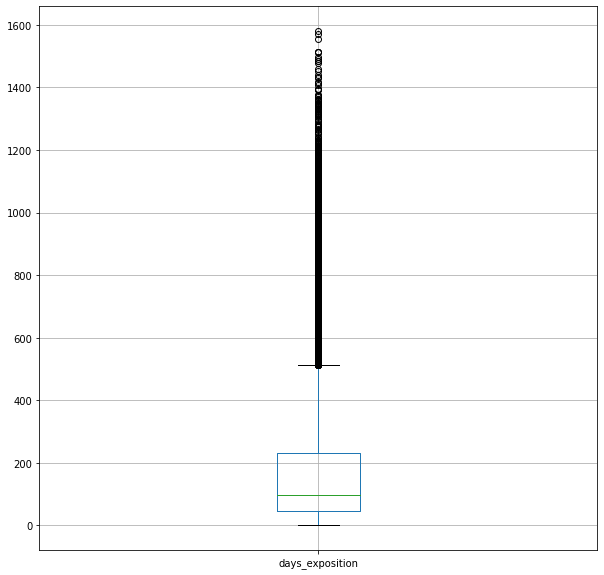

In [94]:
data.boxplot(['days_exposition'], figsize=(10, 10))

In [95]:
display(data['days_exposition'].describe())

count    20120.000000
mean       181.391252
std        220.090942
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее - 180 дней, медиана - 95, при этом наибольшее число 'days_exposition' приходиться на 2-й месяц, на 7-ю неделю. 

Быстрыми признаем продажи произошедшие в течении первых 4-х недель.

Долгими признаем продажи с 'days_exposition' - более 500 дней.

Что интересно есть отдельные значение 'days_exposition' кратно превышающие остальные. Возможно это возникло в следствие какой-то особенности учета 'days_exposition'. 

### Определяем факторы, которые больше всего влияют на общую (полную) стоимость объекта. Изучите, зависит ли цена от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год).

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

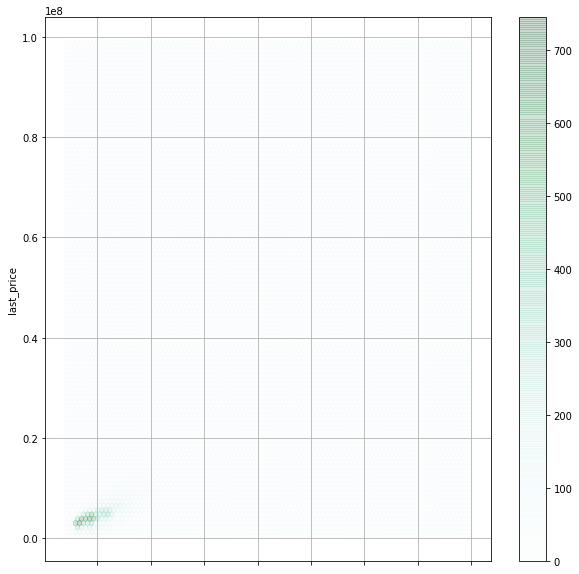

In [96]:
data.plot(x='total_area', y='last_price', kind='hexbin', grid=True, alpha=0.2, figsize=(10, 10)) 

In [97]:
data_1 = data.pivot_table(index='total_area', values='last_price', aggfunc=['min', 'median', 'mean', 'max', 'count'])
data_1.columns = ['min', 'median', 'mean', 'max', 'count']

<AxesSubplot:xlabel='total_area', ylabel='median'>

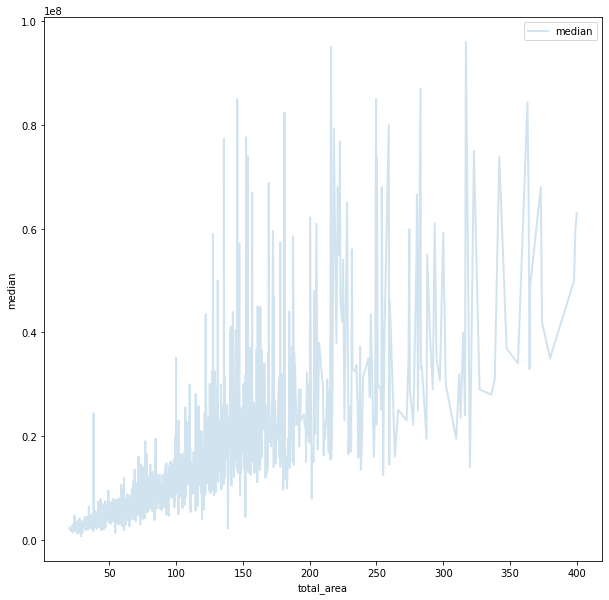

In [98]:
display(data_1['median'].plot(x='total_area', y='median',  linewidth=2, alpha=0.2, ylabel='median',figsize=(10, 10), legend=True)) 

<AxesSubplot:xlabel='total_area', ylabel='mean'>

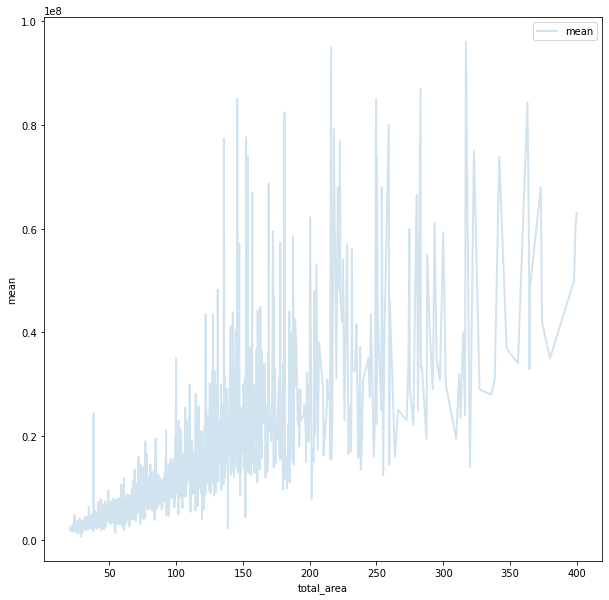

In [99]:
display(data_1['mean'].plot(x='total_area', y='mean',  linewidth=2, alpha=0.2, ylabel='mean', figsize=(10, 10), legend=True))

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

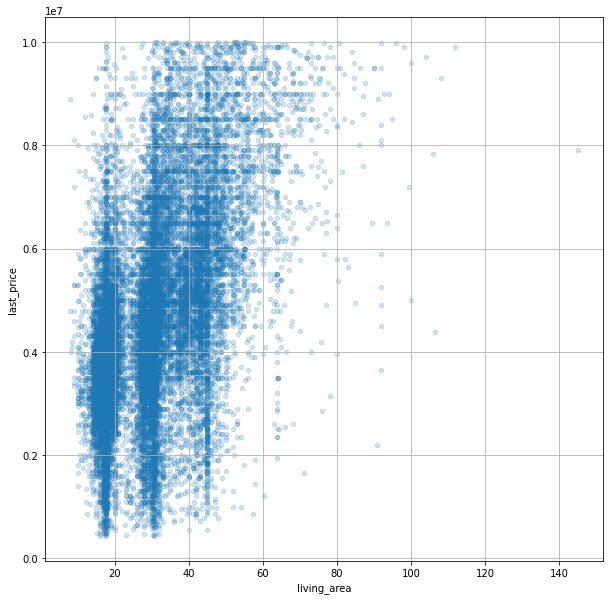

In [100]:
data_1 = data[data['last_price'] < 10_000_000]
data_1.plot(x='living_area', y='last_price', kind='scatter', grid=True, alpha=0.2, figsize=(10, 10)) 

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

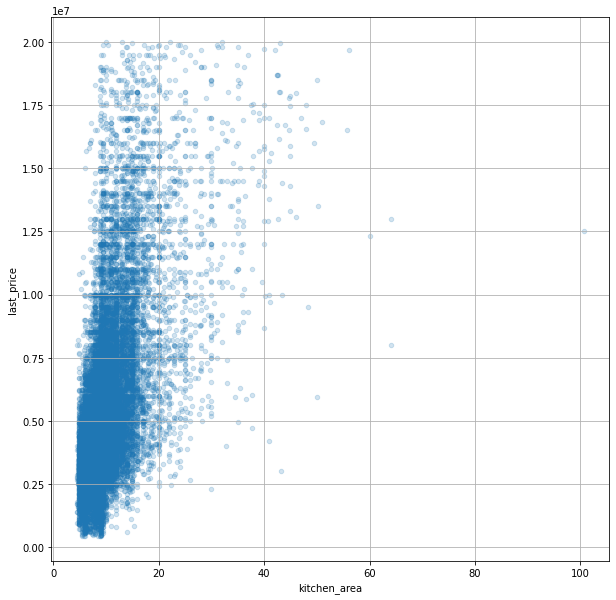

In [101]:
data_1 = data[data['last_price'] < 20_000_000]
data_1.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, alpha=0.2, figsize=(10, 10)) 

,min,median,mean,max,count
rooms,,,,,
1,430000,3600000,3.837954e+06,43511000,7952
2,430000,4780000,5.561068e+06,77612080,7893
3,550000,6200000,8.047454e+06,99000000,5781
4,999000,9000000,1.246190e+07,96000000,1162
5,1650000,13400000,1.853869e+07,95000000,311
6,4390000,17704300,2.342371e+07,90000000,98
7,7900000,22675000,2.654568e+07,82000000,50
8,15800000,21045000,2.726900e+07,68000000,10
9,17000000,23750000,3.415236e+07,88000000,8


<AxesSubplot:xlabel='rooms', ylabel='count'>

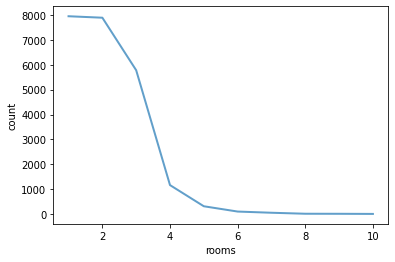

In [102]:
data_1 = data.pivot_table(index='rooms', values='last_price', aggfunc=['min', 'median', 'mean', 'max', 'count'])
data_1.columns = ['min', 'median', 'mean', 'max', 'count']
display(data_1)
display(data_1['count'].plot(x='rooms', y='count',  linewidth=2, alpha=0.7, ylabel='count'))

<AxesSubplot:xlabel='rooms', ylabel='median'>

<AxesSubplot:xlabel='rooms', ylabel='mean'>

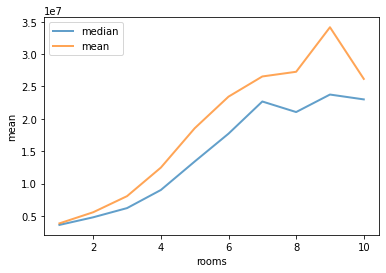

In [103]:
display(data_1['median'].plot(x='rooms', y='median',  linewidth=2, alpha=0.7, ylabel='median', legend=True)) 
display(data_1['mean'].plot(x='rooms', y='mean',  linewidth=2, alpha=0.7, ylabel='mean', legend=True)) 

,min,median,mean,max,count
floor_category,,,,,
другой,450000,4868000.0,6.489649e+06,98000000,17053
неопределен,1995000,5391047.5,7.191669e+06,40348248,78
первый,430000,3900000.0,4.786401e+06,88000000,2860
последний,430000,4300000.0,6.258985e+06,99000000,3277


<AxesSubplot:xlabel='floor_category', ylabel='count'>

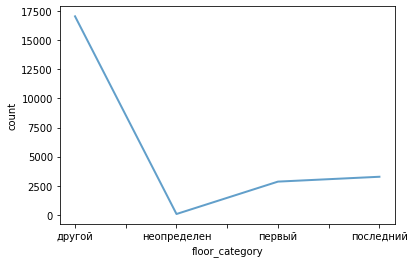

In [104]:
data_1 = data.pivot_table(index='floor_category', values='last_price', aggfunc=['min', 'median', 'mean', 'max', 'count'])
data_1.columns = ['min', 'median', 'mean', 'max', 'count']
display(data_1)
display(data_1['count'].plot(x='floor_category', y='count',  linewidth=2, alpha=0.7, ylabel='count'))

<AxesSubplot:xlabel='floor_category', ylabel='median'>

<AxesSubplot:xlabel='floor_category', ylabel='mean'>

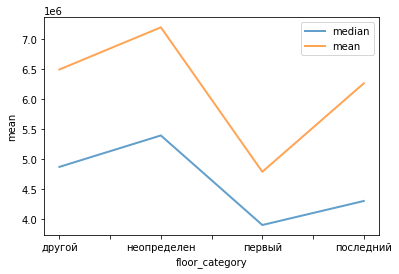

In [105]:
display(data_1['median'].plot(x='floor_category', y='median',  linewidth=2, alpha=0.7, ylabel='median', legend=True)) 
display(data_1['mean'].plot(x='floor_category', y='mean',  linewidth=2, alpha=0.7, ylabel='mean', legend=True)) 

,min,median,mean,max,count
ex_weekday,,,,,
0,430000,4665000,6.270315e+06,82000000,3552
1,430000,4750000,6.178884e+06,95000000,4107
2,450000,4700000,6.253309e+06,88000000,3901
3,450000,4680000,6.512162e+06,86738800,4215
4,450000,4600000,6.179632e+06,99000000,3923
5,550000,4600000,6.075176e+06,98000000,1905
6,470000,4550000,6.078719e+06,95000000,1665


<AxesSubplot:xlabel='ex_weekday', ylabel='count'>

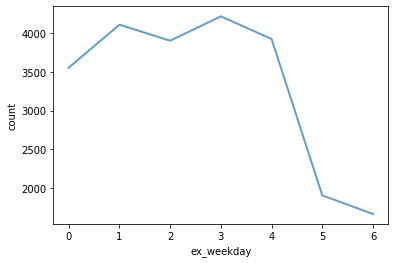

In [106]:
data_1 = data.pivot_table(index='ex_weekday', values='last_price', aggfunc=['min', 'median', 'mean', 'max', 'count'])
data_1.columns = ['min', 'median', 'mean', 'max', 'count']
display(data_1)
display(data_1['count'].plot(x='ex_weekday', y='count',  linewidth=2, alpha=0.7, ylabel='count'))

<AxesSubplot:xlabel='ex_weekday', ylabel='median'>

<AxesSubplot:xlabel='ex_weekday', ylabel='mean'>

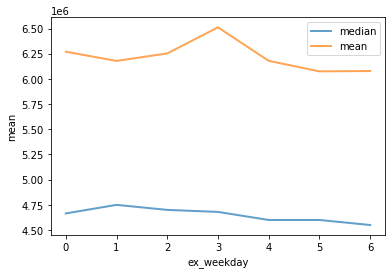

In [107]:
display(data_1['median'].plot(x='ex_weekday', y='median',  linewidth=2, alpha=0.7, ylabel='median', legend=True)) 
display(data_1['mean'].plot(x='ex_weekday', y='mean',  linewidth=2, alpha=0.7, ylabel='mean', legend=True)) 

<AxesSubplot:xlabel='ex_year,ex_month', ylabel='count'>

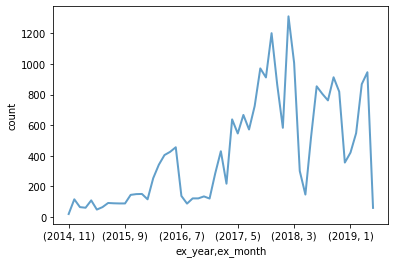

In [108]:
data_1 = data.pivot_table(index=['ex_year', 'ex_month'], values='last_price', aggfunc=['min', 'median', 'mean', 'max', 'count'])
data_1.columns = ['min', 'median', 'mean', 'max', 'count']
display(data_1['count'].plot(x='ex_year', y='count',  linewidth=2, alpha=0.7, ylabel='count'))

<AxesSubplot:xlabel='ex_year,ex_month', ylabel='median'>

<AxesSubplot:xlabel='ex_year,ex_month', ylabel='mean'>

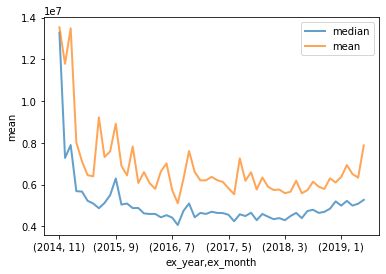

In [109]:
display(data_1['median'].plot(x='ex_year', y='median',  linewidth=2, alpha=0.7, ylabel='median', legend=True)) 
display(data_1['mean'].plot(x='ex_year', y='mean',  linewidth=2, alpha=0.7, ylabel='mean', legend=True)) 

,min,median,mean,max,count
ex_year,,,,,
2014,1200000,7640000,1.204660e+07,79339000,136
2015,650000,5300000,7.796482e+06,86738800,1155
2016,490000,4550000,6.392298e+06,90000000,2725
2017,450000,4500000,6.189723e+06,98000000,8030
2018,430000,4600000,5.854533e+06,99000000,8379
2019,430000,5100000,6.545139e+06,95000000,2843


<AxesSubplot:xlabel='ex_year', ylabel='count'>

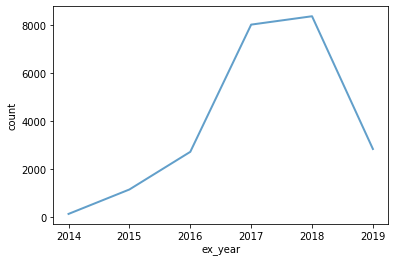

In [110]:
data_1 = data.pivot_table(index='ex_year', values='last_price', aggfunc=['min', 'median', 'mean', 'max', 'count'])
data_1.columns = ['min', 'median', 'mean', 'max', 'count']
display(data_1)
display(data_1['count'].plot(x='ex_year', y='count',  linewidth=2, alpha=0.7, ylabel='count'))

<AxesSubplot:xlabel='ex_year', ylabel='median'>

<AxesSubplot:xlabel='ex_year', ylabel='mean'>

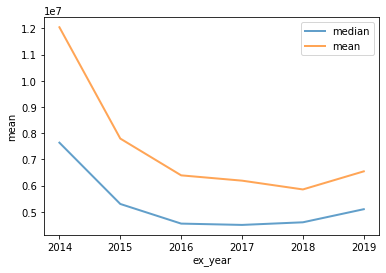

In [111]:
display(data_1['median'].plot(x='ex_year', y='median',  linewidth=2, alpha=0.7, ylabel='median', legend=True)) 
display(data_1['mean'].plot(x='ex_year', y='mean',  linewidth=2, alpha=0.7, ylabel='mean', legend=True))

,min,median,mean,max,count
ex_month,,,,,
1,480000,4600000,6.384919e+06,99000000,1470
2,450000,4650000,6.249593e+06,95000000,2604
3,550000,4700000,6.090820e+06,88000000,2544
4,430000,4800000,6.105036e+06,77000000,2339
5,490000,4560000,6.276758e+06,82400000,1244
6,430000,4400000,6.142251e+06,90000000,1736
7,440000,4677500,6.353244e+06,96000000,1654
8,450000,4600000,6.186211e+06,85000000,1707
9,520000,4700000,6.413962e+06,86738800,1944


<AxesSubplot:xlabel='ex_month', ylabel='count'>

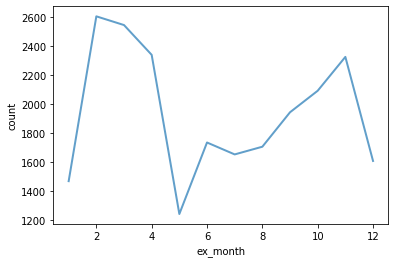

In [112]:
data_1 = data.pivot_table(index='ex_month', values='last_price', aggfunc=['min', 'median', 'mean', 'max', 'count'])
data_1.columns = ['min', 'median', 'mean', 'max', 'count']
display(data_1)
display(data_1['count'].plot(x='ex_month', y='count',  linewidth=2, alpha=0.7, ylabel='count'))

<AxesSubplot:xlabel='ex_month', ylabel='median'>

<AxesSubplot:xlabel='ex_month', ylabel='mean'>

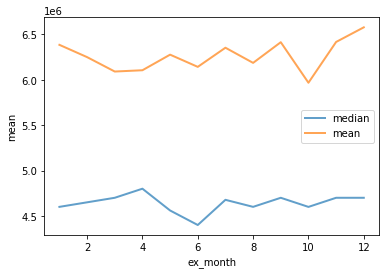

In [113]:
display(data_1['median'].plot(x='ex_month', y='median',  linewidth=2, alpha=0.7, ylabel='median', legend=True)) 
display(data_1['mean'].plot(x='ex_month', y='mean',  linewidth=2, alpha=0.7, ylabel='mean', legend=True)) 

In [114]:
data_1 = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ex_weekday', 'ex_month', 'ex_year']]
data_1.corr()

,last_price,total_area,living_area,kitchen_area,rooms,ex_weekday,ex_month,ex_year
last_price,1.000000,0.763225,0.647943,0.559757,0.468368,-0.005518,0.008860,-0.052484
total_area,0.763225,1.000000,0.915817,0.567907,0.782990,-0.010218,0.009767,-0.084841
living_area,0.647943,0.915817,1.000000,0.380498,0.872660,-0.009833,0.001720,-0.074344
kitchen_area,0.559757,0.567907,0.380498,1.000000,0.247525,-0.012807,0.007562,-0.058147
rooms,0.468368,0.782990,0.872660,0.247525,1.000000,-0.006114,-0.000152,-0.052736
ex_weekday,-0.005518,-0.010218,-0.009833,-0.012807,-0.006114,1.000000,0.009923,-0.003203
ex_month,0.008860,0.009767,0.001720,0.007562,-0.000152,0.009923,1.000000,-0.271737
ex_year,-0.052484,-0.084841,-0.074344,-0.058147,-0.052736,-0.003203,-0.271737,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_pric

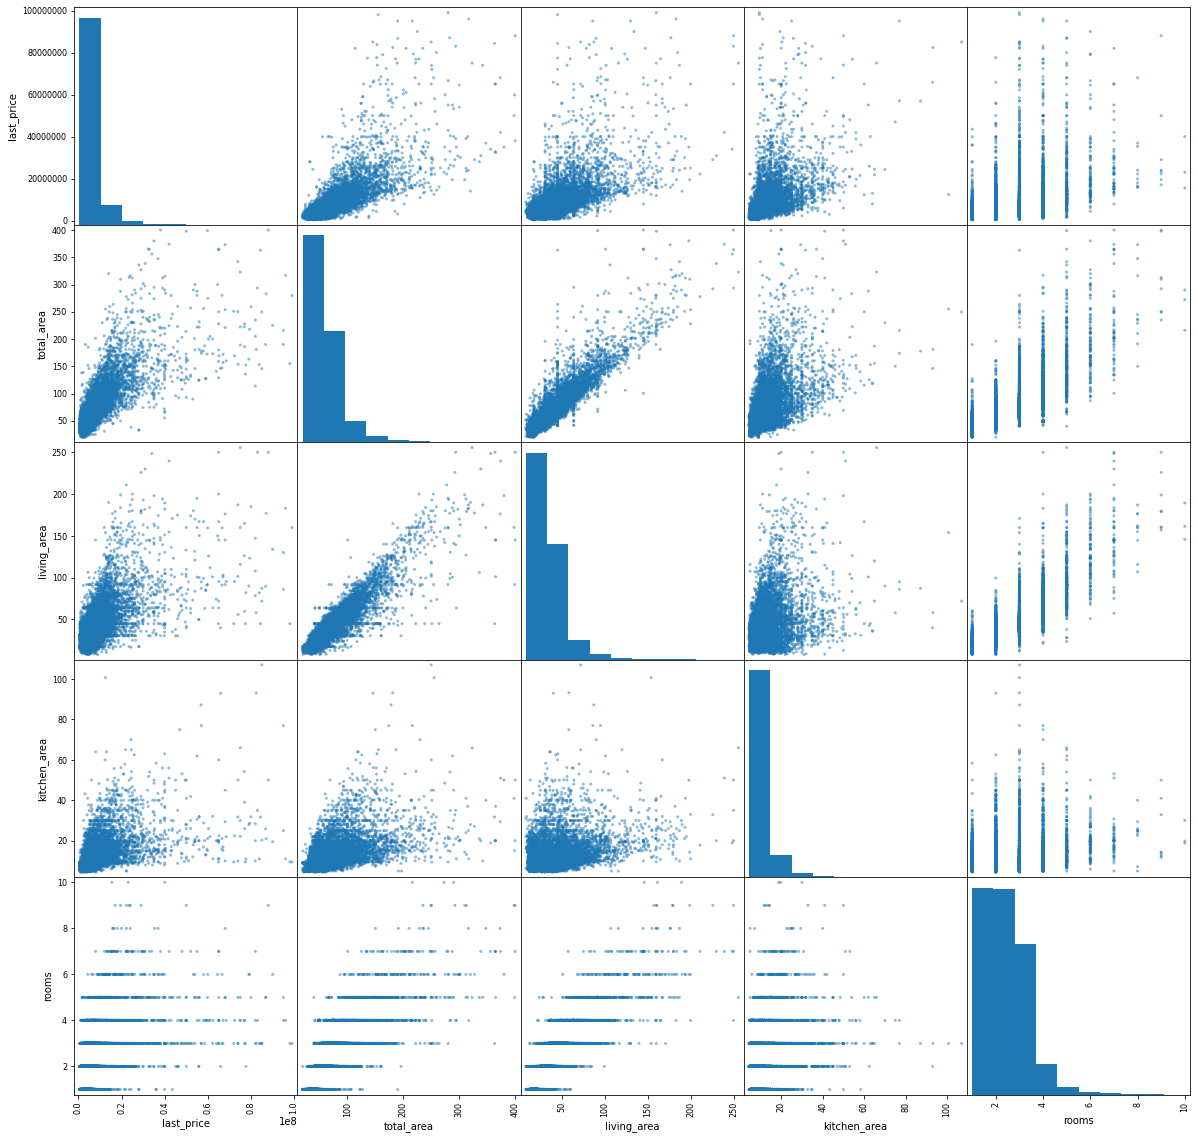

In [115]:
data_1 = data_1[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]
pd.plotting.scatter_matrix(data_1, figsize=(20, 20)) 

Чем больше 'total_area' тем больше 'last_price' - прямая зависимость. Для нашей выборки наибольший коэф. корреляции - 1-е место;

Чем больше 'living_area' тем больше 'last_price' - прямая зависимость. 2-е место; 

Чем больше 'kitchen_area' тем больше 'last_price' - прямая зависимость. Резкий рост, 3-е место;

Чем больше 'rooms' тем больше 'last_price' - есть прямая положительная зависимость до 5-ти комнат, дальше обратная. 'rooms' больше  зависят от 'living_area';

Также для квартир с 1 комнатой медиана и среднее практически совпадают;

Категория этажа 'floor_category' влияет так: первый этаж самый дешевый, затем идет последний, категория "Другой" - самый дорогой. При этом квартир на первом этаже меньше чем на последнем;

Год размещения - с 2014 до 2017 шло снижени средней и медианной цены размещенного объявления, с 2017 начался рост цены. 

Месяц размещения - практически не влияет, незначительное снижение в мае-июне. Можно наблюдать что при уменьшении количества новых объявлений начинаются резкие скачки средней цены, преимущественно вверх.

День недели размещения 'ex_weekday' - в выходные незначительно снижается цена и значительно в 2 раза количество объявлений. Вероятно в выходные этим занимаются сами собственники, а в буднии подключаются агенства. Агенство за услуги берет примерно 200_000 руб;

### Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [116]:
data_1 = data.pivot_table(index=['town_category', 'locality_name_clean'], 
                          values=['total_area', 'price_per_m2', 'last_price'], 
                          aggfunc=['mean', 'sum', 'count'])
display(data_1.head(5))
data_1.columns = ['mean_pr', 'mean_pr_m2', 'mean_ar', 'sum_pr', 'sum_pr_m2', 'sum_ar', 'count_pr', 'count_pr_m2', 'count_ar']
data_1['mean_from_sum'] = data_1['sum_pr'] / data_1['sum_ar']
display(data_1.head(5))

mean                           \
                                     last_price  price_per_m2 total_area   
town_category locality_name_clean                                          
Город         Бокситогорск         8.461875e+05  17551.591250  48.075000   
              Волосово             1.977778e+06  40183.326111  50.184722   
              Волхов               1.739909e+06  35087.680000  49.655856   
              Всеволожск           3.822762e+06  68683.761969  56.487545   
              Выборг               3.267876e+06  58285.918162  56.344274   

                                          sum                          \
                                   last_price price_per_m2 total_area   
town_category locality_name_clean                                       
Город         Бокситогорск           13539000    280825.46     769.20   
              Волосово               71200000   1446599.74    1806.65   
              Волхов                193129900   3894732.48    5511.80   
              Всеволожск           1494699965  26855350.93   22086.63   
              Выборг                764683000  13638904.85   13184.56   

                                       count                          
                                  last_price price_per_m2 total_area  
town_category locality_name_clean                                     
Город         Бокситогорск                16           16         16  
              Волосово                    36           36         36  
              Волхов                     111          111        111  
              Всеволожск                 391          391        391  
              Выборг                     234          234        234

mean_pr    mean_pr_m2    mean_ar  \
town_category locality_name_clean                                          
Город         Бокситогорск         8.461875e+05  17551.591250  48.075000   
              Волосово             1.977778e+06  40183.326111  50.184722   
              Волхов               1.739909e+06  35087.680000  49.655856   
              Всеволожск           3.822762e+06  68683.761969  56.487545   
              Выборг               3.267876e+06  58285.918162  56.344274   

                                       sum_pr    sum_pr_m2    sum_ar  \
town_category locality_name_clean                                      
Город         Бокситогорск           13539000    280825.46    769.20   
              Волосово               71200000   1446599.74   1806.65   
              Волхов                193129900   3894732.48   5511.80   
              Всеволожск           1494699965  26855350.93  22086.63   
              Выборг                764683000  13638904.85  13184.56   

                                   count_pr  count_pr_m2  count_ar  \
town_category locality_name_clean                                    
Город         Бокситогорск               16           16        16   
              Волосово                   36           36        36   
              Волхов                    111          111       111   
              Всеволожск                391          391       391   
              Выборг                    234          234       234   

                                   mean_from_sum  
town_category locality_name_clean                 
Город         Бокситогорск          17601.404056  
              Волосово              39409.957656  
              Волхов                35039.351936  
              Всеволожск            67674.424075  
              Выборг                57998.370822

In [117]:
data_1 = data_1.sort_values(by='count_pr', ascending=False)
data_1 = data_1.drop(['mean_pr', 'mean_ar', 'sum_pr', 'sum_pr_m2', 'sum_ar', 'count_pr_m2', 'count_ar'], axis=1)
display(data_1.head(10))

mean_pr_m2  count_pr  mean_from_sum
town_category locality_name_clean                                        
Город         Санкт-Петербург      113427.252521     15476  118887.950548
              Мурино                85307.962226       557   82905.686365
              Кудрово               95128.691544       447   93832.683481
п.            Шушары                78238.944700       434   76119.311642
Город         Всеволожск            68683.761969       391   67674.424075
              Пушкин               103081.147092       368  105085.631195
              Колпино               75447.716973       337   74490.122588
п.            Парголово             90259.622050       322   87119.058135
Город         Гатчина               68742.808954       306   68472.533303
              Выборг                58285.918162       234   57998.370822

Среди населенных пунктов с наибольшим количеством объявлений по средней стоимости м2:

Самый дорогой - Город Санкт-Петербург. 
Самый дешевый - Город Выборг.

Средняя стоимость расчитаная как средняя средней цены за м2 - 'mean_pr_m2' и средняя расчитаная как 'sum_last_price' / 'sum_total_area'  различается незначительно.

Шушары вероятно скоро станет Городом по документам.

### Строим график изменения средней цены для каждого километра от центра Петербурга

15476

7612031.803696046

,mean,count
city_centers_km,,
0.0,2.654331e+07,26
1.0,1.620666e+07,182
2.0,1.497462e+07,300
3.0,1.116475e+07,346
4.0,1.137495e+07,674
5.0,1.270880e+07,895
6.0,1.334552e+07,598
7.0,1.388169e+07,412
8.0,9.281153e+06,587


<AxesSubplot:xlabel='city_centers_km', ylabel='mean'>

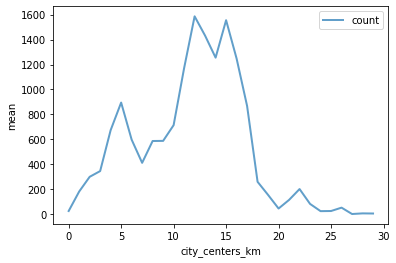

In [118]:
data_spb = data.query('locality_name_clean == "Санкт-Петербург"')
display(len(data_spb))
display(data_spb['last_price'].mean())
data_spb = data_spb.pivot_table(index='city_centers_km', values='last_price', aggfunc=['mean', 'count'])
data_spb.columns = ['mean', 'count']
display(data_spb.head(20))
display(data_spb['count'].plot(x='city_centers_km', y='count',  linewidth=2, alpha=0.7, ylabel='mean', legend=True)) 

<AxesSubplot:xlabel='city_centers_km', ylabel='mean'>

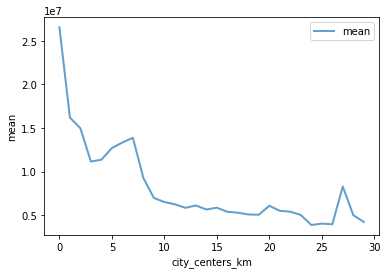

In [119]:
display(data_spb['mean'].plot(x='city_centers_km', y='mean',  linewidth=2, alpha=0.7, ylabel='mean', legend=True)) 

В самом центре цена в 2,5 раза выше средней и практически линейно быстро падает до 9 км, далее в диапазоне 10-20 км в котором расположено наибольшее количество предложений скорость снижения цены замедляется, но характер также линейный. Последующие всплески цены и количества предложений - это пригороды.
На графике есть значение 0 т.к. мы округляли. 

<AxesSubplot:xlabel='total_area', ylabel='price_per_m2'>

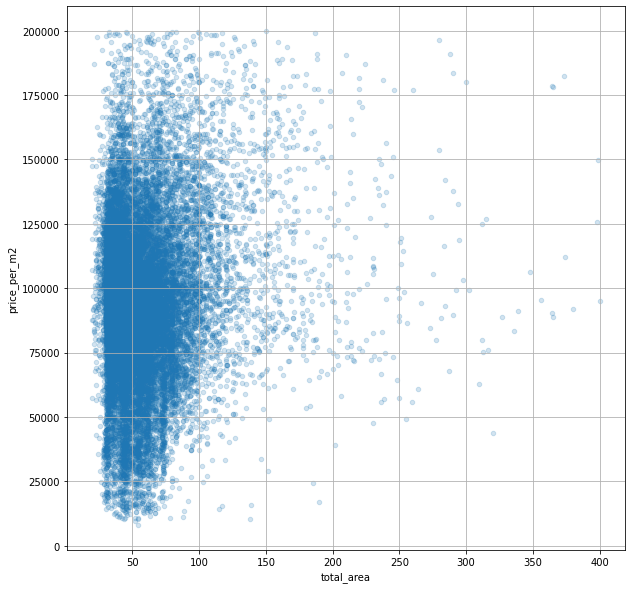

In [120]:
data.query('price_per_m2 < 200_000').plot(x='total_area', y='price_per_m2', kind='scatter', grid=True, alpha=0.2, figsize=(10, 10)) 

## Общий вывод

**По сбору данных:**
Автоматический сбор - нет данных для Ленинградской области, некорректные значения по паркам и водоемам.

Заполнение пользователем - 40% пропусков по графе ceiling_height, а это важный фактор. Можно использовать данные по типовым проектам, собирать информацию по каждому адресу/подъезду/этажу или сделать обязательным к заполнению и сделать инструкцию для пользователей. Аналогично по графе floors_total.

Столбцы living_area и kitchen_area -  для типовых зданий можно заполнить точно, нужен адрес, серия дома, этаж, подъезд. 

Но у нас сейчас нет этих данных и мы заполнили пропуски в living_area и kitchen_area  медианными значениями, в соответсвии с rooms. 

Информация по расстоянию до аэропорта, центра города, парков и водоемов указана для Санкт-Петербурга. Для Ленинградской области эта информация пропущена. 

balcony - можно по умолчанию ставить 0.

studio -  порядка 140 шт

is_apartment - 50 шт

open_plan - 66 шт - Удалили эти строки

Полезно в таблицу добавить адрес, координаты, предложить пользователю указать муниципальное образование(из выпадающего списка, в соотв. с законом субъекта РФ)

**По исследовательскому анализу данных:**

Мы оставили в выборке предложения удовлетворяющие: 

20 <= 'total_area' <= 400 

400_000 <= 'last_price' <= 100_000_000

'rooms' <= 10)

'ceiling_height' > 2 & 'ceiling_height' <= 6

'floors_total'  <= 38

'living_area' >= 8

'kitchen_area' >= 4.5

'open_plan' == False

а также пропуски.

Расстояние до центра города указано по дорогам.
Просадка в количестве предложений на 7-8 км от центра - "Серый пояс"-старые промышленные районы, сейчас активно застраиваются. Пик  на 12-15 км спальные районы. Последующие всплески отдельные населенные пункты входящие в субъект "Санкт-Петербург".

*Ближайшие парки описаны некорректно*, как упоминалось в начале. Возможно значения надо умножить на 10, но это тоже не правдоподобно. В таком виде эти данные можно трактовать так *Если столбец  заполнен значит в 10 минутах хотьбы есть парк* 

**Скорость продажи:**

Среднее - 180 дней, медиана - 95, при этом наибольшее число 'days_exposition' приходиться на 2-й месяц, на 7-ю неделю.

Быстрыми признаем продажи произошедшие в течении первых 4-х недель.

Долгими признаем продажи с 'days_exposition' - более 500 дней.

**Влияние на стоимость:**

Чем больше 'total_area' тем больше 'last_price' - прямая зависимость. Для нашей выборки наибольший коэф. корреляции - 1-е место;

Чем больше 'living_area' тем больше 'last_price' - прямая зависимость. 2-е место; 

Чем больше 'kitchen_area' тем больше 'last_price' - прямая зависимость. Резкий рост, 3-е место;

Чем больше 'rooms' тем больше 'last_price' - есть прямая положительная зависимость до 5-ти комнат, дальше обратная. 'rooms' больше  зависят от 'living_area'.  Также для квартир с 1 комнатой медиана и среднее практически совпадают;

Категория этажа 'floor_category' влияет так: первый этаж самый дешевый, затем идет последний, категория "Другой" - самый дорогой. При этом квартир на первом этаже меньше чем на последнем;

Год размещения - с 2014 до 2017 шло снижени средней и медианной цены размещенного объявления, с 2017 начался рост цены.

Месяц размещения - практически не влияет, незначительное снижение в мае-июне. Можно наблюдать что при уменьшении количества новых объявлений начинаются резкие скачки средней цены, преимущественно вверх.

День недели размещения 'ex_weekday' - в выходные незначительно снижается цена и значительно в 2 раза количество объявлений. Вероятно в выходные этим занимаются сами собственники, а в буднии подключаются агенства. Агенство за услуги берет примерно 200_000 руб;

**Среди населенных пунктов с наибольшим количеством объявлений по средней стоимости м2:**

Самый дорогой - Город Санкт-Петербург ~ 115_000 руб/м2. 
Самый дешевый - Город Выборг ~ 58_000 руб/м2. 

Шушары вероятно скоро станет Городом по документам.

**Влияние близости к центру города**

В самом центре цена в 2,5 раза выше средней и практически линейно быстро падает до 9 км, далее в диапазоне 10-20 км в котором расположено наибольшее количество предложений скорость снижения цены замедляется, но характер также линейный. 

В пригородах средние цены выше чем в спальных районах.